In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns

# Two consolidated tables embedded in Python notebook

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/id-payment/Customer_ID_payment.csv', low_memory=False)


In [1]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/data-merge/Cab_Data_merge.csv', low_memory=False)


# Customer_id_payment.csv for company having max cab users for particular period of time

In [2]:
df1

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Transaction ID.1  \
0              30.45         370.95      313.6350          10000011   
1              28.62         358.52      334.8540          10000012   
2               9.04         125.20       97.6320          10000013   
3              33.17         377.40      351.6020          10000014   
4               8.73         114.62       97.7760          10000015   
...              ...            ...           ...               ...   
359387          4.80          69.24       63.3600          10359398   
359388          8.40         113.75      106.8480          10359399   
359389         27.75         437.07      349.6500          10359400   
359390          8.80         146.19      114.0480          10359401   
359391         12.76         191.58      177.6192          10359402   

        Customer ID Payment_Mode  
0             29290         Card  
1             27703         Card  
2             28712         Cash  
3             28020         Cash  
4             27182         Card  
...             ...          ...  
359387        52022         Cash  
359388        52234         Cash  
359389        52326         Card  
359390        51413         Card  
359391        51697         Cash  

[359392 rows x 10 columns]

# Tables showing Attributes of the customer segments

In [28]:
df

Customer ID Gender   Age  Income (USD/Month)  Transaction ID  \
0           29290.0   Male  28.0             10813.0      10000011.0   
1           27703.0   Male  27.0              9237.0      10000012.0   
2           28712.0   Male  53.0             11242.0      10000013.0   
3           28020.0   Male  23.0             23327.0      10000014.0   
4           27182.0   Male  33.0              8536.0      10000015.0   
...             ...    ...   ...                 ...             ...   
440094          NaN    NaN   NaN                 NaN      10440104.0   
440095          NaN    NaN   NaN                 NaN      10440105.0   
440096          NaN    NaN   NaN                 NaN      10440106.0   
440097          NaN    NaN   NaN                 NaN      10440107.0   
440098          NaN    NaN   NaN                 NaN      10440108.0   

        Customer ID.1 Payment_Mode  
0             29290.0         Card  
1             27703.0         Card  
2             28712.0         Cash  
3             28020.0         Cash  
4             27182.0         Card  
...               ...          ...  
440094        53286.0         Cash  
440095        52265.0         Cash  
440096        52175.0         Card  
440097        52917.0         Card  
440098        51587.0         Card  

[440099 rows x 7 columns]

# We need to explore


# Areas to investigate:

# Which company has maximum cab users at a particular time period?
# Does margin proportionally increase with increase in number of customers?
# What are the attributes of these customer segments?

In [6]:
df.head()

Customer ID Gender   Age  Income (USD/Month)  Transaction ID  \
0      29290.0   Male  28.0             10813.0      10000011.0   
1      27703.0   Male  27.0              9237.0      10000012.0   
2      28712.0   Male  53.0             11242.0      10000013.0   
3      28020.0   Male  23.0             23327.0      10000014.0   
4      27182.0   Male  33.0              8536.0      10000015.0   

   Customer ID.1 Payment_Mode  
0        29290.0         Card  
1        27703.0         Card  
2        28712.0         Cash  
3        28020.0         Cash  
4        27182.0         Card

In [9]:
df1.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Transaction ID.1  Customer ID Payment_Mode  
0         370.95       313.635          10000011        29290         Card  
1         358.52       334.854          10000012        27703         Card  
2         125.20        97.632          10000013        28712         Cash  
3         377.40       351.602          10000014        28020         Cash  
4         114.62        97.776          10000015        27182         Card

In [7]:
df.shape


(440099, 7)

In [8]:
df1.shape

(359392, 10)

In [36]:
print(df[['Gender', 'Income (USD/Month)']].isnull().sum())


Gender                390928
Income (USD/Month)    390928
dtype: int64


In [3]:
df

Customer ID Gender   Age  Income (USD/Month)  Transaction ID  \
0           29290.0   Male  28.0             10813.0      10000011.0   
1           27703.0   Male  27.0              9237.0      10000012.0   
2           28712.0   Male  53.0             11242.0      10000013.0   
3           28020.0   Male  23.0             23327.0      10000014.0   
4           27182.0   Male  33.0              8536.0      10000015.0   
...             ...    ...   ...                 ...             ...   
440094          NaN    NaN   NaN                 NaN      10440104.0   
440095          NaN    NaN   NaN                 NaN      10440105.0   
440096          NaN    NaN   NaN                 NaN      10440106.0   
440097          NaN    NaN   NaN                 NaN      10440107.0   
440098          NaN    NaN   NaN                 NaN      10440108.0   

        Customer ID.1 Payment_Mode  
0             29290.0         Card  
1             27703.0         Card  
2             28712.0         Cash  
3             28020.0         Cash  
4             27182.0         Card  
...               ...          ...  
440094        53286.0         Cash  
440095        52265.0         Cash  
440096        52175.0         Card  
440097        52917.0         Card  
440098        51587.0         Card  

[440099 rows x 7 columns]

In [4]:
count_A = df['Gender'].value_counts().get('Male', 0)
count_B = df['Gender'].value_counts().get('Female', 0)

print(f"Count of 'Male': {count_A}")
print(f"Count of 'Female': {count_B}")

Count of 'Male': 26562
Count of 'Female': 22609


# Visualization Analysis showing variation between Cost of Trip and Price Charged Vs Company
# Yellow Cab have higher Profit Margin than Pink Cab

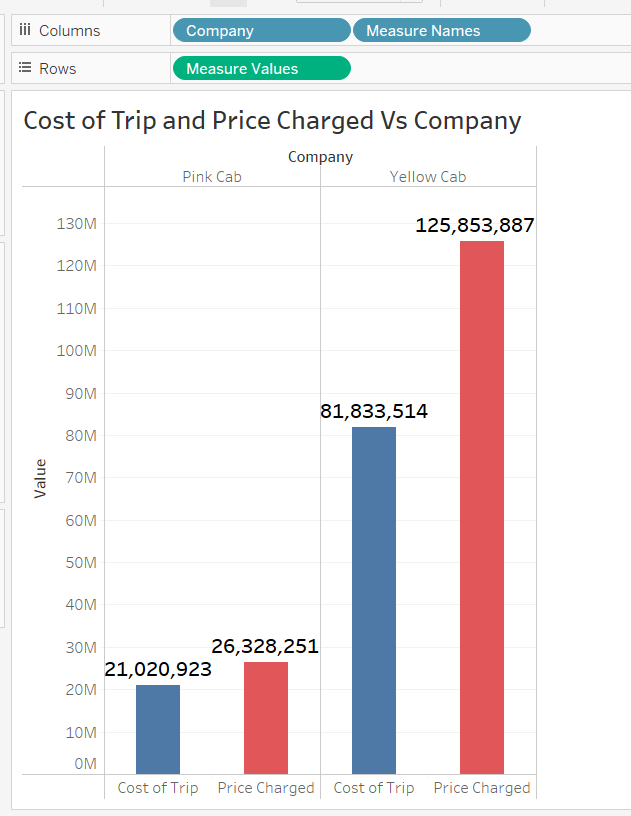

# Yellow Cab has 274,681 users than Pink Cab which got 84,711 users

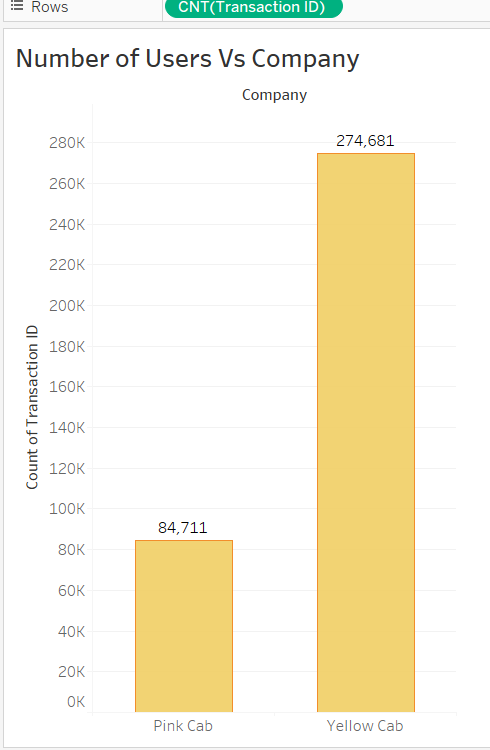

# Visualization shows (Pink Cab Company and Yellow Cab Company) 
# Kilometres travelled in each city for both Company

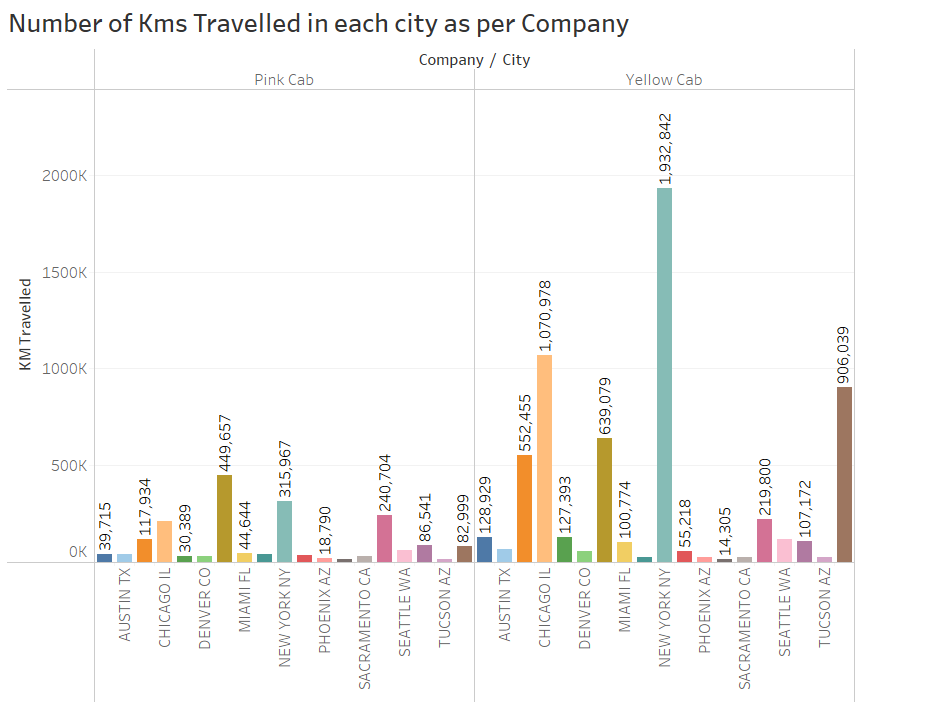

# Vizualisation shows Company Vs Number of Kms 
 Travelled in years 2016,2017,2018

# **2018** is the Year which shows linear progress comparing 
# to previous years 2016,and 2017 
# Kms travelled by Pink Cab and Yellow Cab

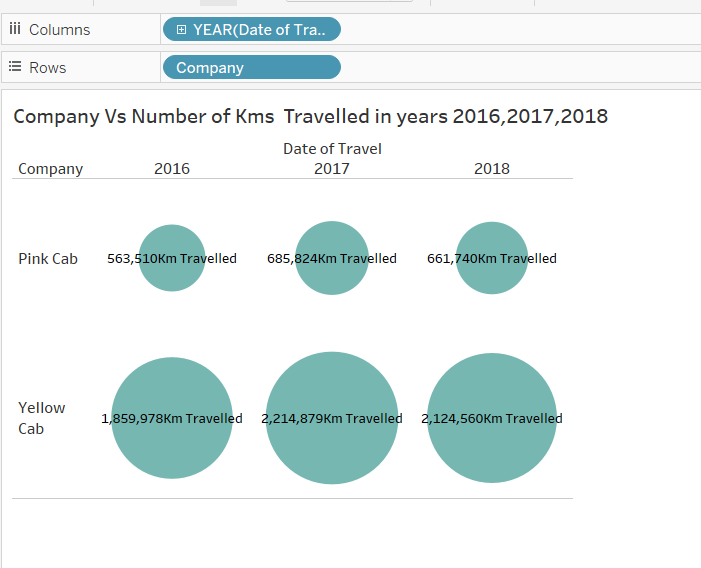

# For Pink Cab
# it's 20 percent increase in Payment mode of **CARD OVER CASH**

# For Yellow Cab
# it's 19.89 percent increase in Payment mode of **CARD OVER CASH**


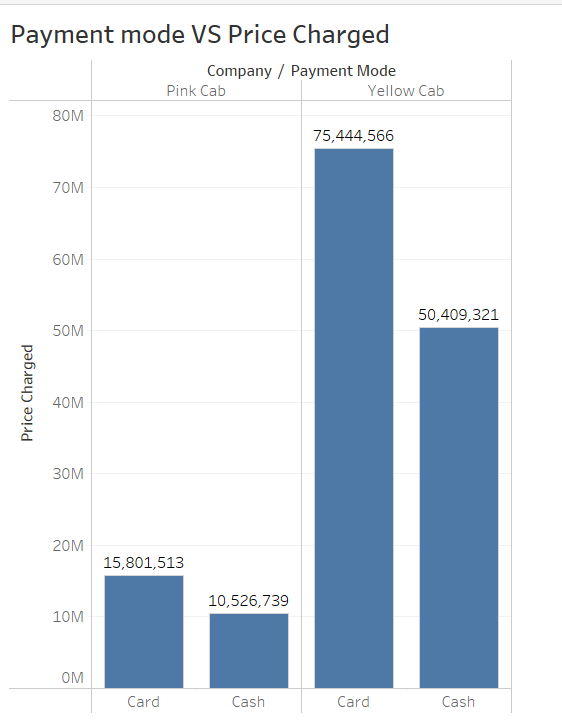

# In General, the count for Card users are 215,542 Vs Cash users 143,840
# **Card users  are more in number**

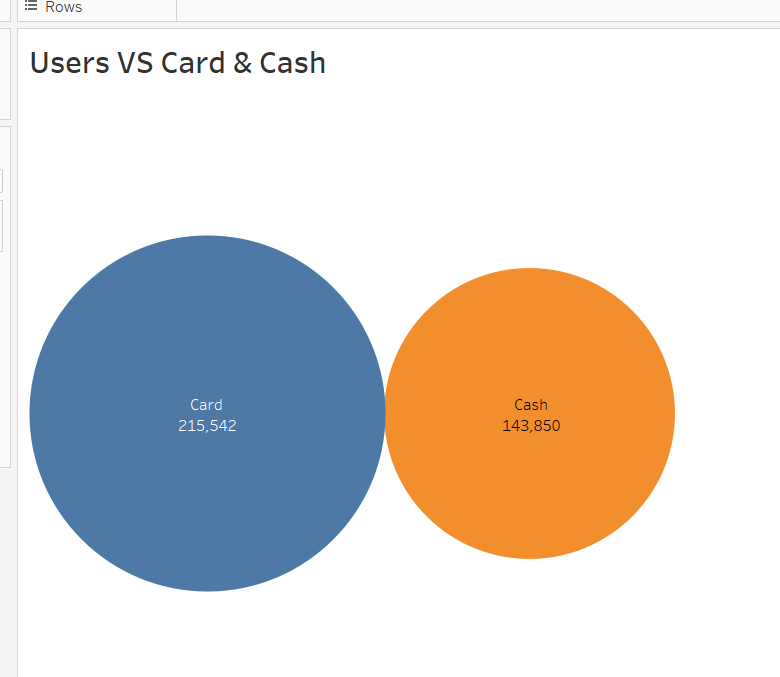

# The Chart Below shows Distribution of Income(USD/Month)
# for male in the total Customers

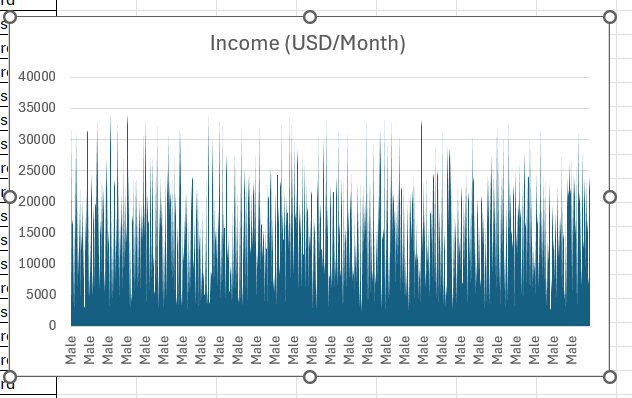

# The Chart below Distribution of Income(USD/Month)
# for female Gender in the total customers

# 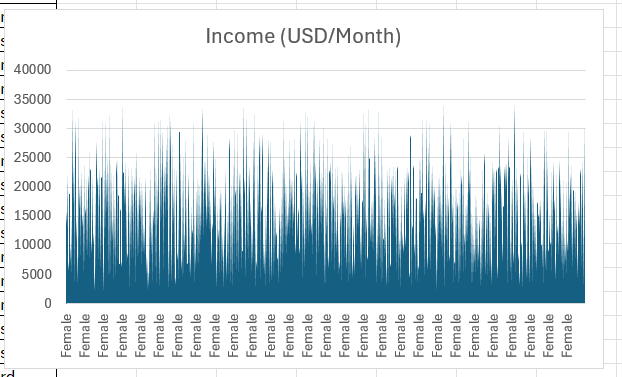

# Univariante Analysis to determine income based on gender

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

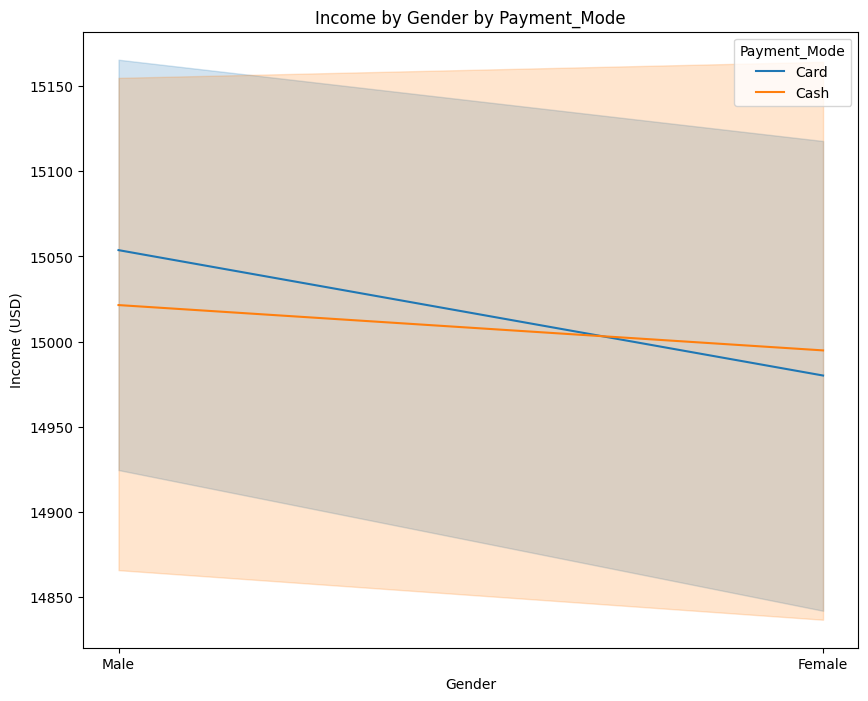

In [64]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = "Gender", y = "Income (USD/Month)", data = df, hue = "Payment_Mode")
 
plt.title("Income by Gender by Payment_Mode")
plt.xlabel("Gender")
plt.ylabel("Income (USD)")
plt.show()

# Univariante Analysis to determine Average income by gender

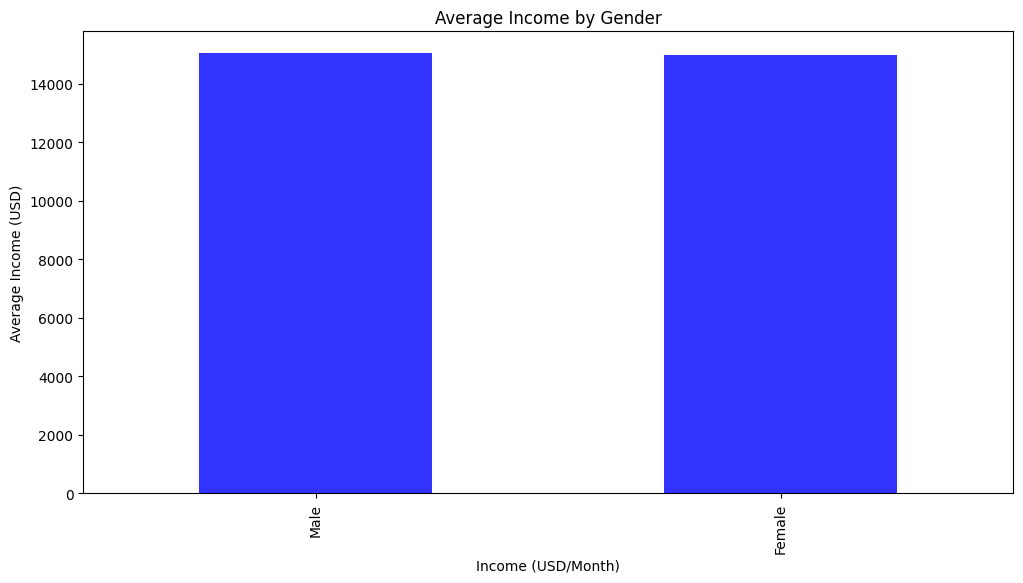

In [51]:
plt.figure(figsize=(12, 6))
avg_income_by_gender = df.groupby('Gender')['Income (USD/Month)'].mean().sort_values(ascending=False)[:10]
avg_income_by_gender.plot(kind='bar', color='blue', alpha=0.8)
plt.title('Average Income by Gender')
plt.xlabel('Income (USD/Month)')
plt.ylabel('Average Income (USD)')
plt.show()

In [2]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/data-merge/Cab_Data_merge.csv', low_memory=False)


In [3]:
df1

Transaction ID Date of Travel     Company           City  \
0             10000011     2016-01-08    Pink Cab     ATLANTA GA   
1             10000012     2016-01-06    Pink Cab     ATLANTA GA   
2             10000013     2016-01-02    Pink Cab     ATLANTA GA   
3             10000014     2016-01-07    Pink Cab     ATLANTA GA   
4             10000015     2016-01-03    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-08  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-04  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-05  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-05  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-02  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  Transaction ID.1  \
0              30.45         370.95      313.6350          10000011   
1              28.62         358.52      334.8540          10000012   
2               9.04         125.20       97.6320          10000013   
3              33.17         377.40      351.6020          10000014   
4               8.73         114.62       97.7760          10000015   
...              ...            ...           ...               ...   
359387          4.80          69.24       63.3600          10359398   
359388          8.40         113.75      106.8480          10359399   
359389         27.75         437.07      349.6500          10359400   
359390          8.80         146.19      114.0480          10359401   
359391         12.76         191.58      177.6192          10359402   

        Customer ID Payment_Mode  
0             29290         Card  
1             27703         Card  
2             28712         Cash  
3             28020         Cash  
4             27182         Card  
...             ...          ...  
359387        52022         Cash  
359388        52234         Cash  
359389        52326         Card  
359390        51413         Card  
359391        51697         Cash  

[359392 rows x 10 columns]

# Univariante Analysis to determine Customers in City
# Newyork have more Cab users

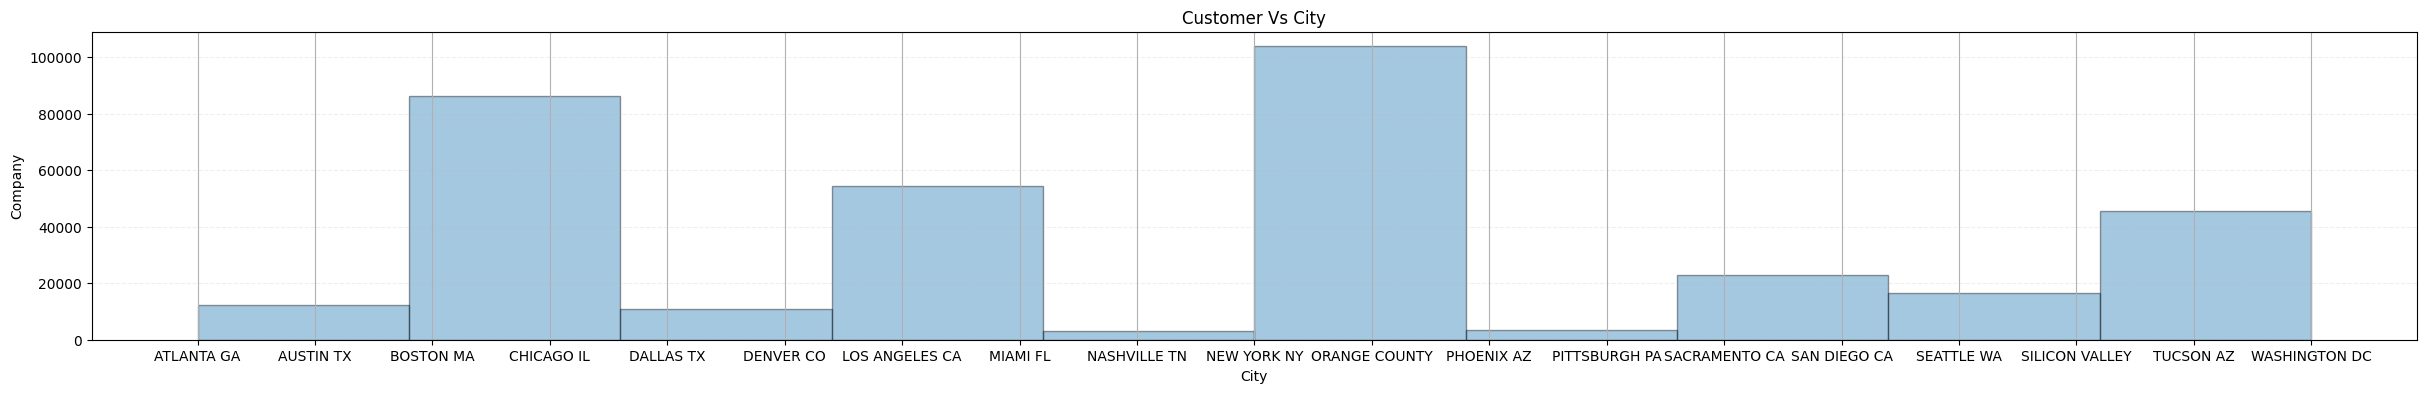

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df1' is your DataFrame
plt.figure(figsize=(30, 4))  # Optional: Set the figure size
df1['City'].hist(bins=10, edgecolor='black', alpha=0.4)
plt.xlabel('City')
plt.ylabel('Company')
plt.title('Customer Vs City')
plt.grid(axis='y', linestyle='--', alpha=0.2)
plt.show()

In [85]:
pivot_table_sales = pd.pivot_table(
data=df1,
values='Company',
index='City',
aggfunc='sum'

)
pivot_table_sales

Company
City                                                             
ATLANTA GA      Pink CabPink CabPink CabPink CabPink CabPink C...
AUSTIN TX       Pink CabPink CabYellow CabYellow CabYellow Cab...
BOSTON MA       Pink CabPink CabPink CabPink CabPink CabPink C...
CHICAGO IL      Pink CabPink CabPink CabPink CabPink CabPink C...
DALLAS TX       Pink CabPink CabPink CabPink CabPink CabPink C...
DENVER CO       Pink CabPink CabPink CabPink CabYellow CabYell...
LOS ANGELES CA  Pink CabPink CabPink CabPink CabPink CabPink C...
MIAMI FL        Pink CabPink CabPink CabYellow CabYellow CabYe...
NASHVILLE TN    Pink CabPink CabYellow CabYellow CabPink CabPi...
NEW YORK NY     Pink CabPink CabPink CabPink CabPink CabPink C...
ORANGE COUNTY   Pink CabPink CabPink CabPink CabPink CabPink C...
PHOENIX AZ      Pink CabPink CabYellow CabYellow CabYellow Cab...
PITTSBURGH PA   Pink CabPink CabYellow CabYellow CabYellow Cab...
SACRAMENTO CA   Pink CabPink CabPink CabYellow CabYellow CabYe...
SAN DIEGO CA    Pink CabPink CabPink CabPink CabPink CabPink C...
SEATTLE WA      Pink CabPink CabPink CabPink CabPink CabPink C...
SILICON VALLEY  Pink CabPink CabPink CabPink CabPink CabPink C...
TUCSON AZ       Pink CabPink CabYellow CabYellow CabYellow Cab...
WASHINGTON DC   Pink CabPink CabPink CabPink CabPink CabPink C...

# 

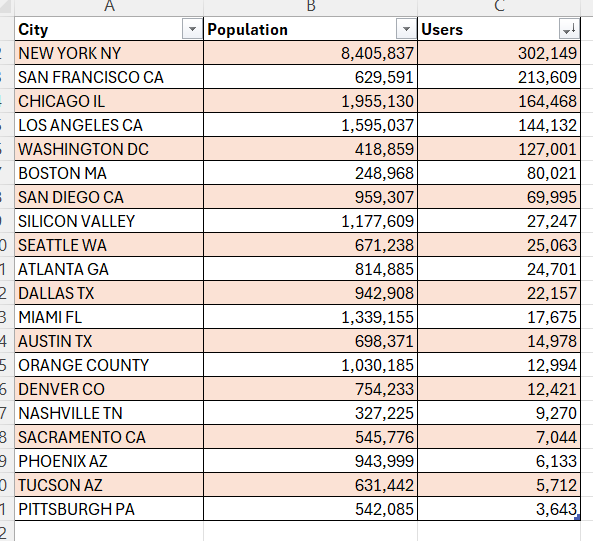

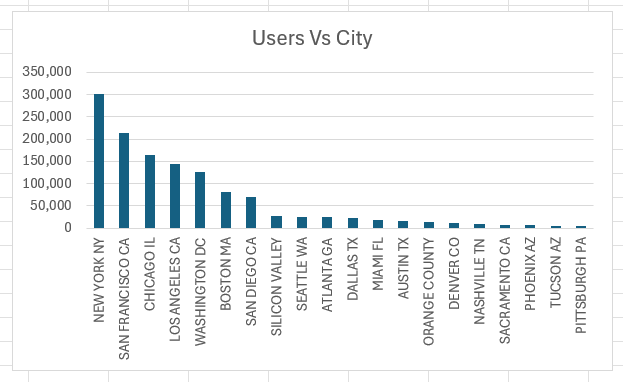

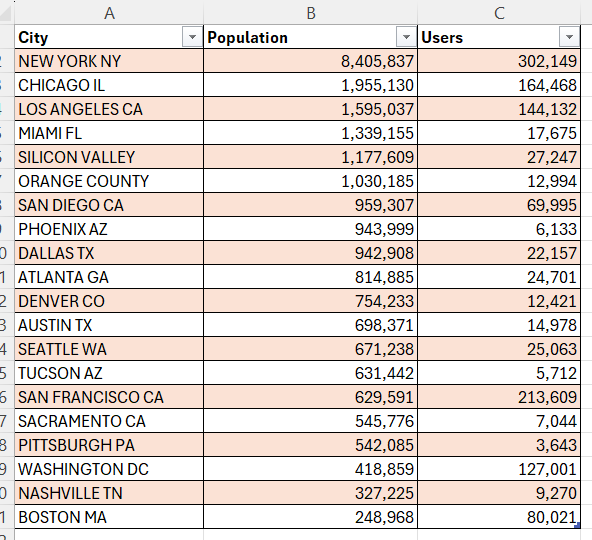

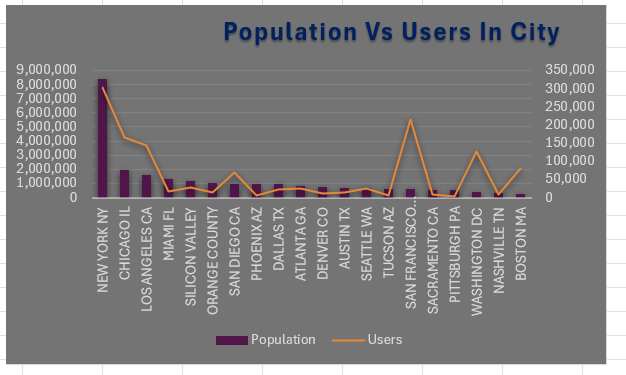

# Day Frequency in Rides Vs Year

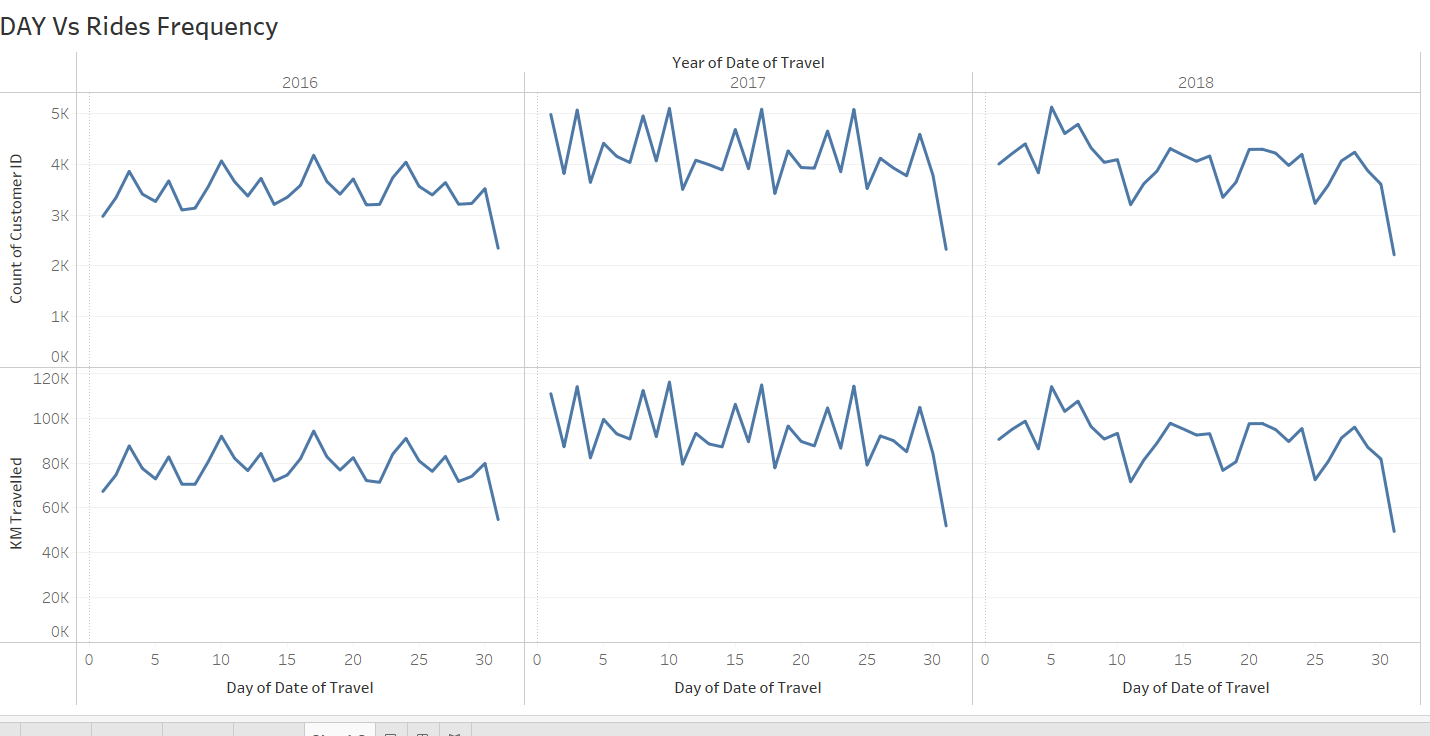

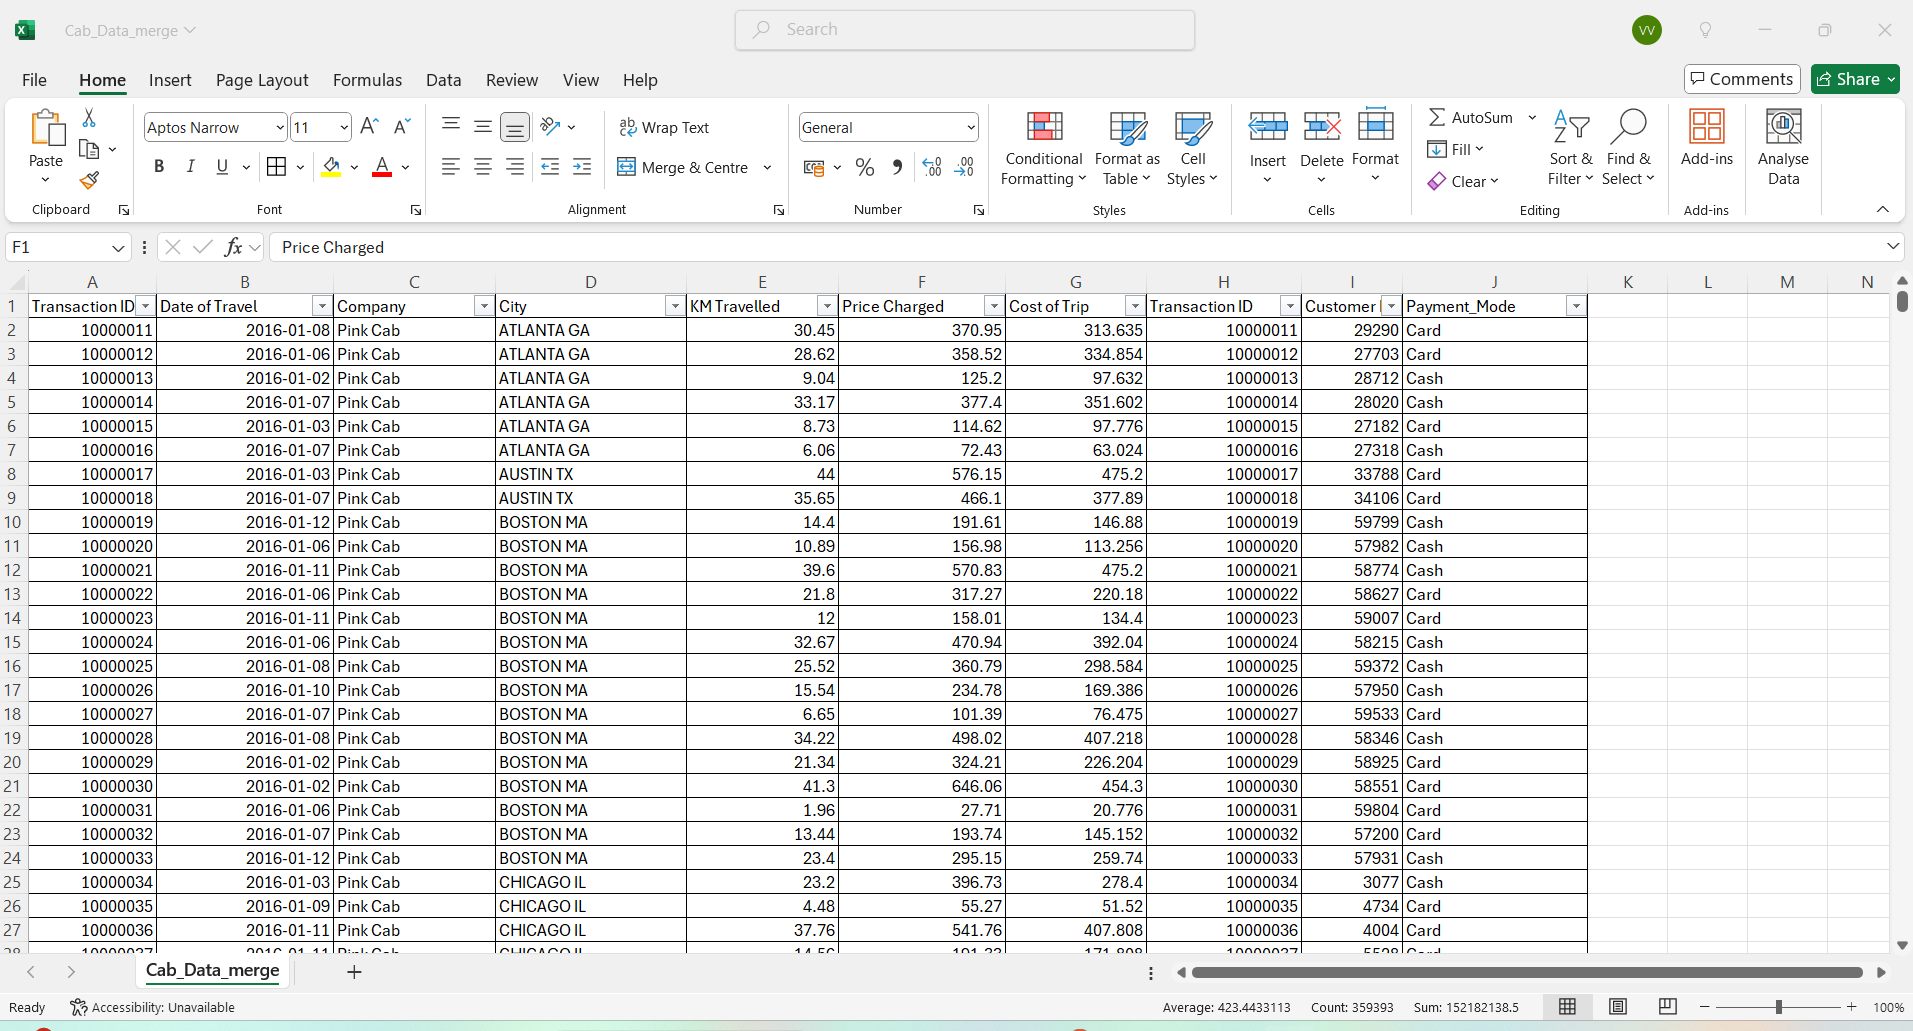

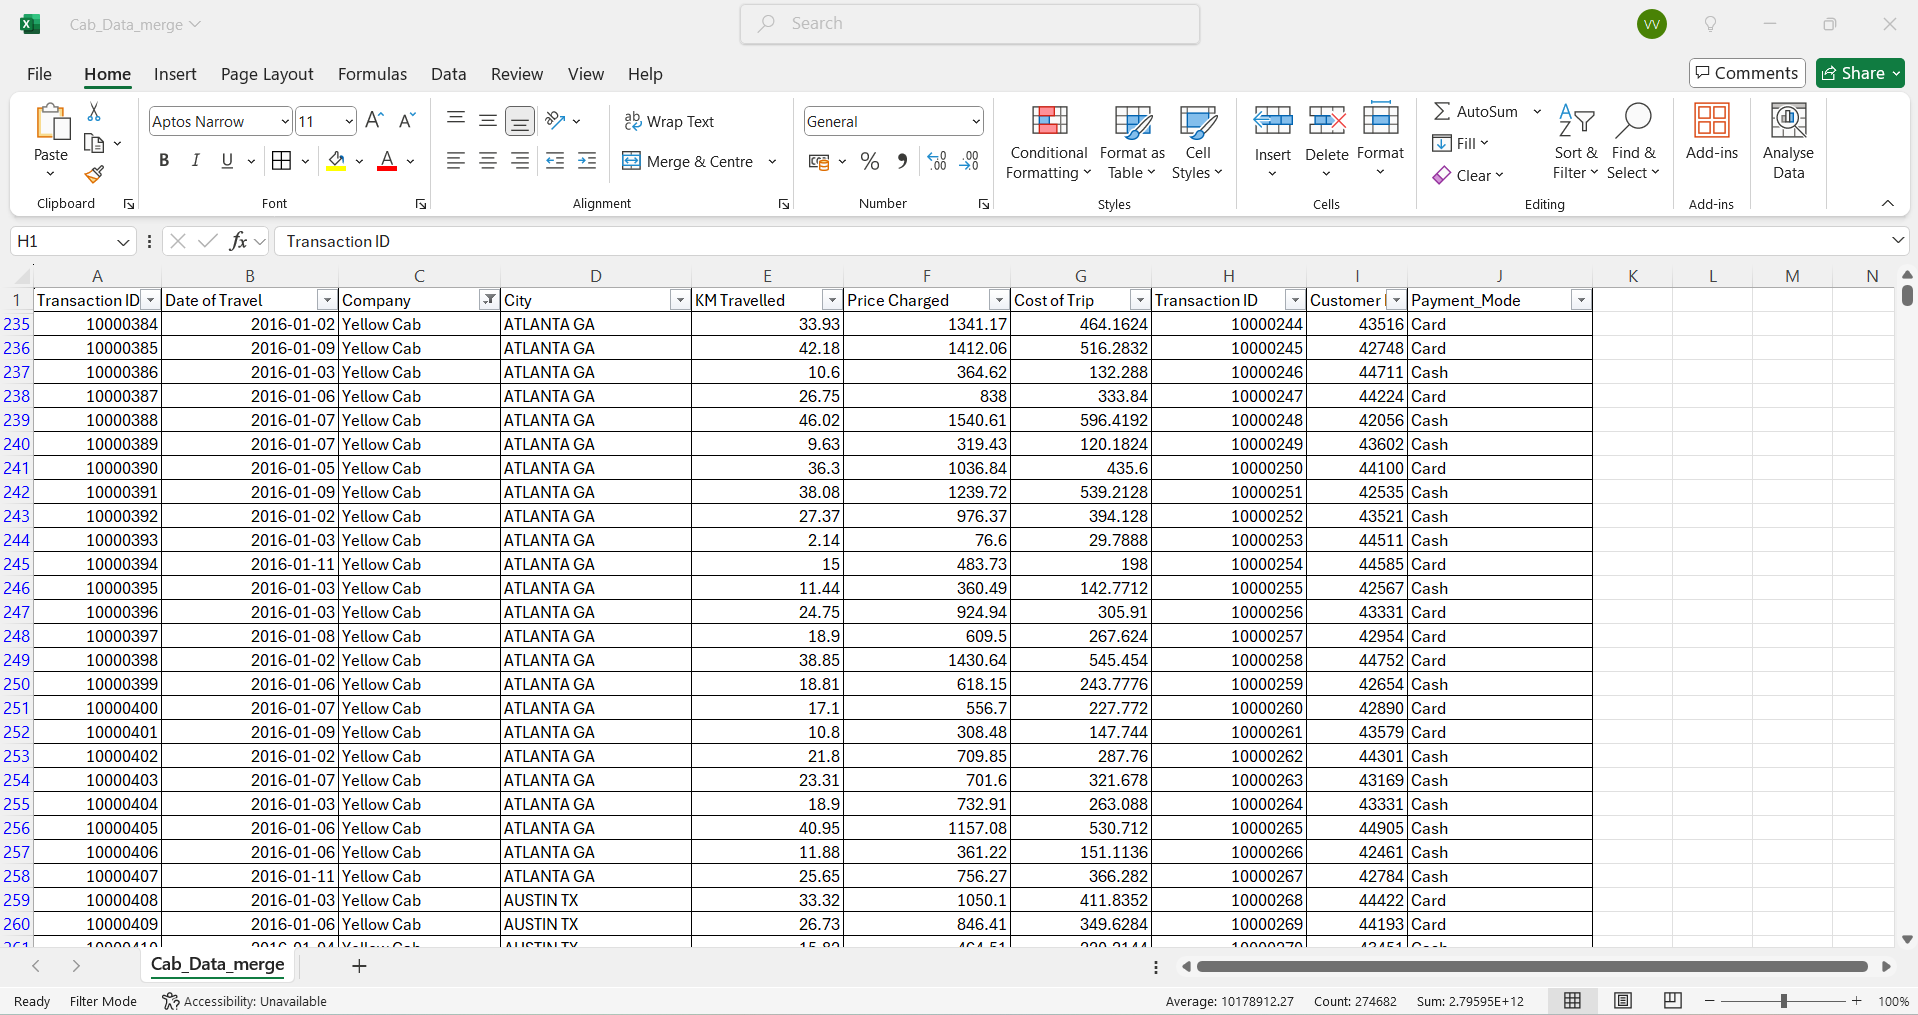

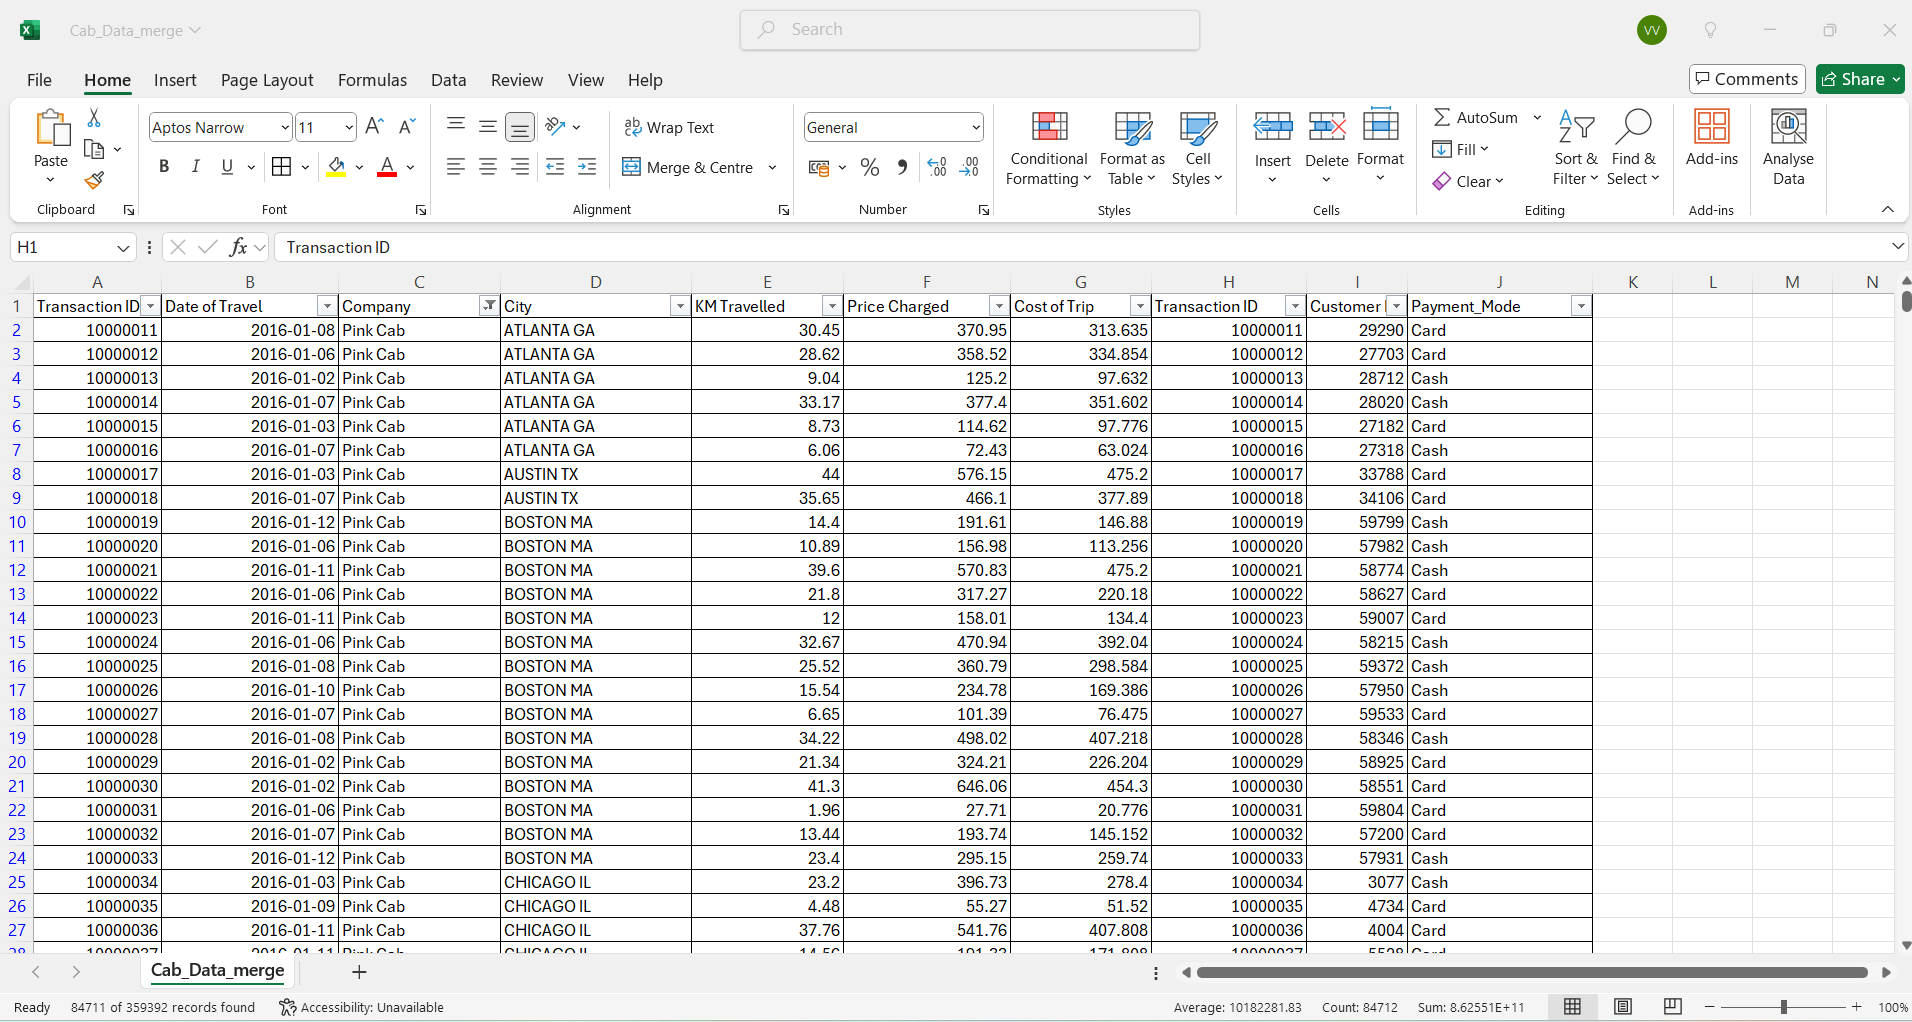



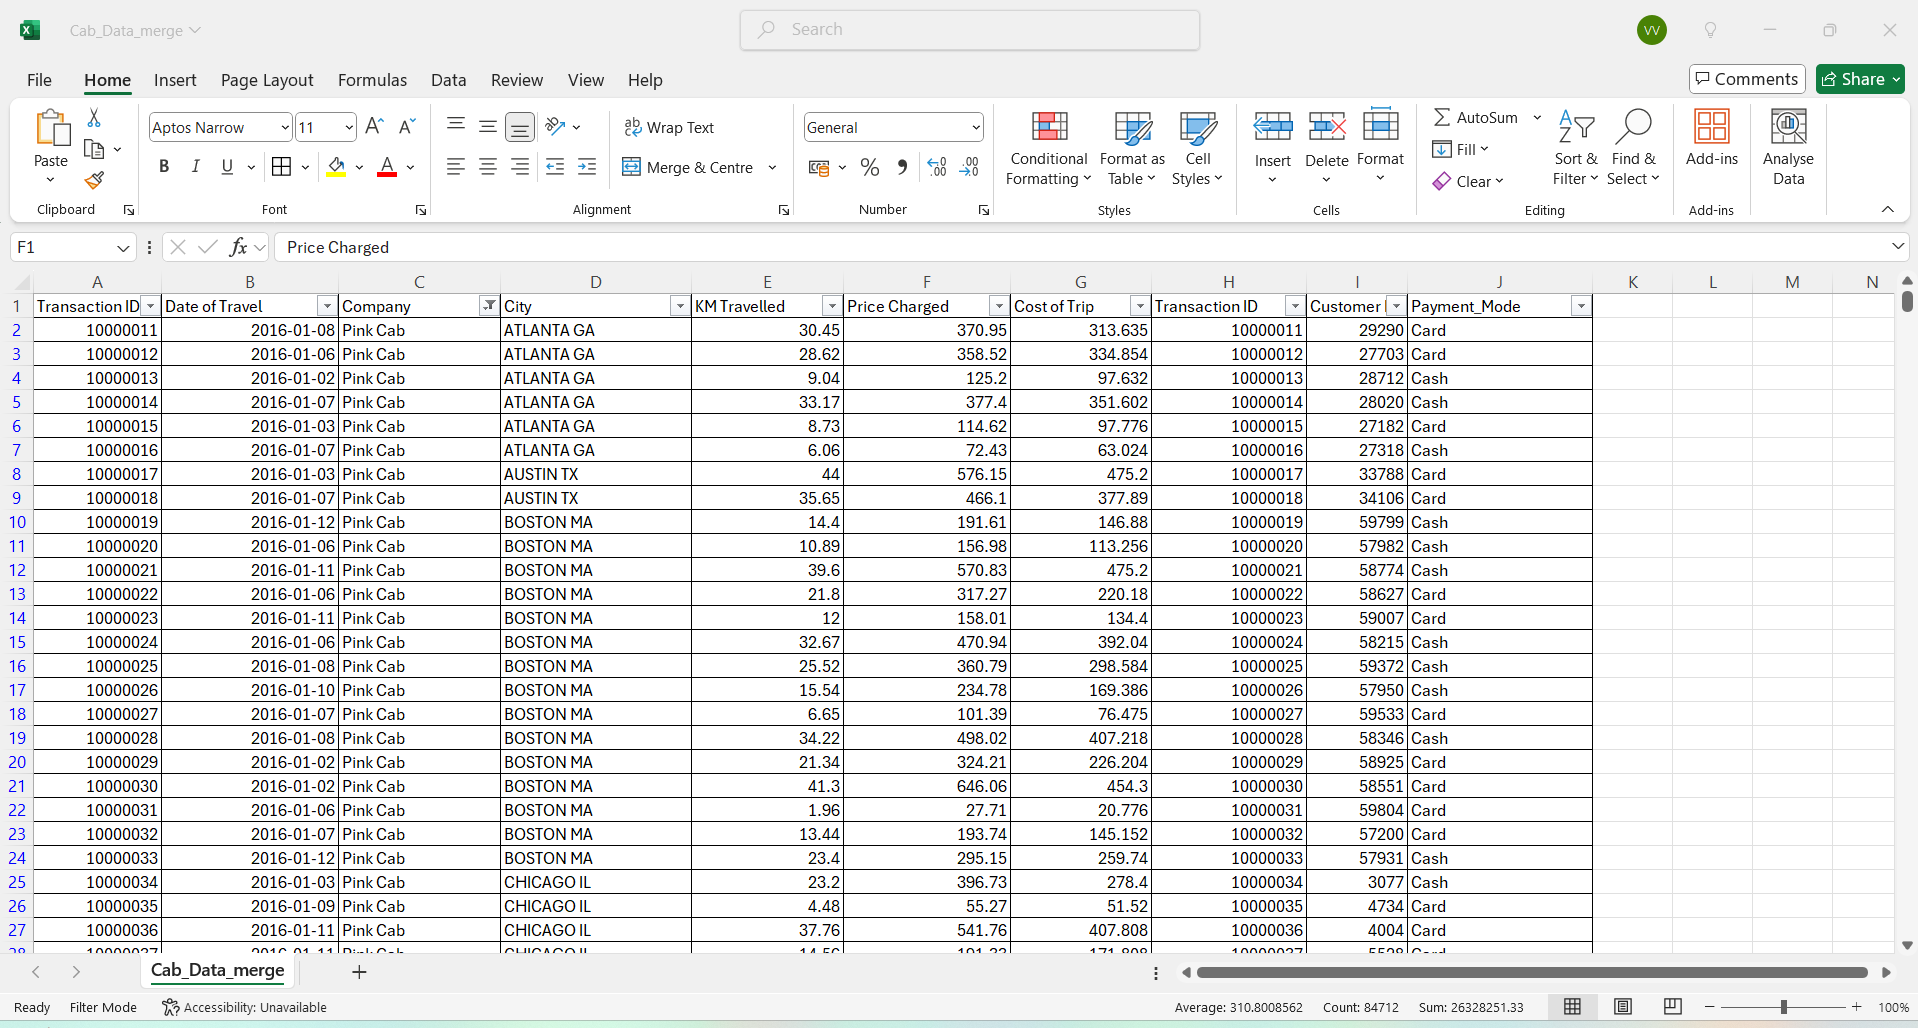

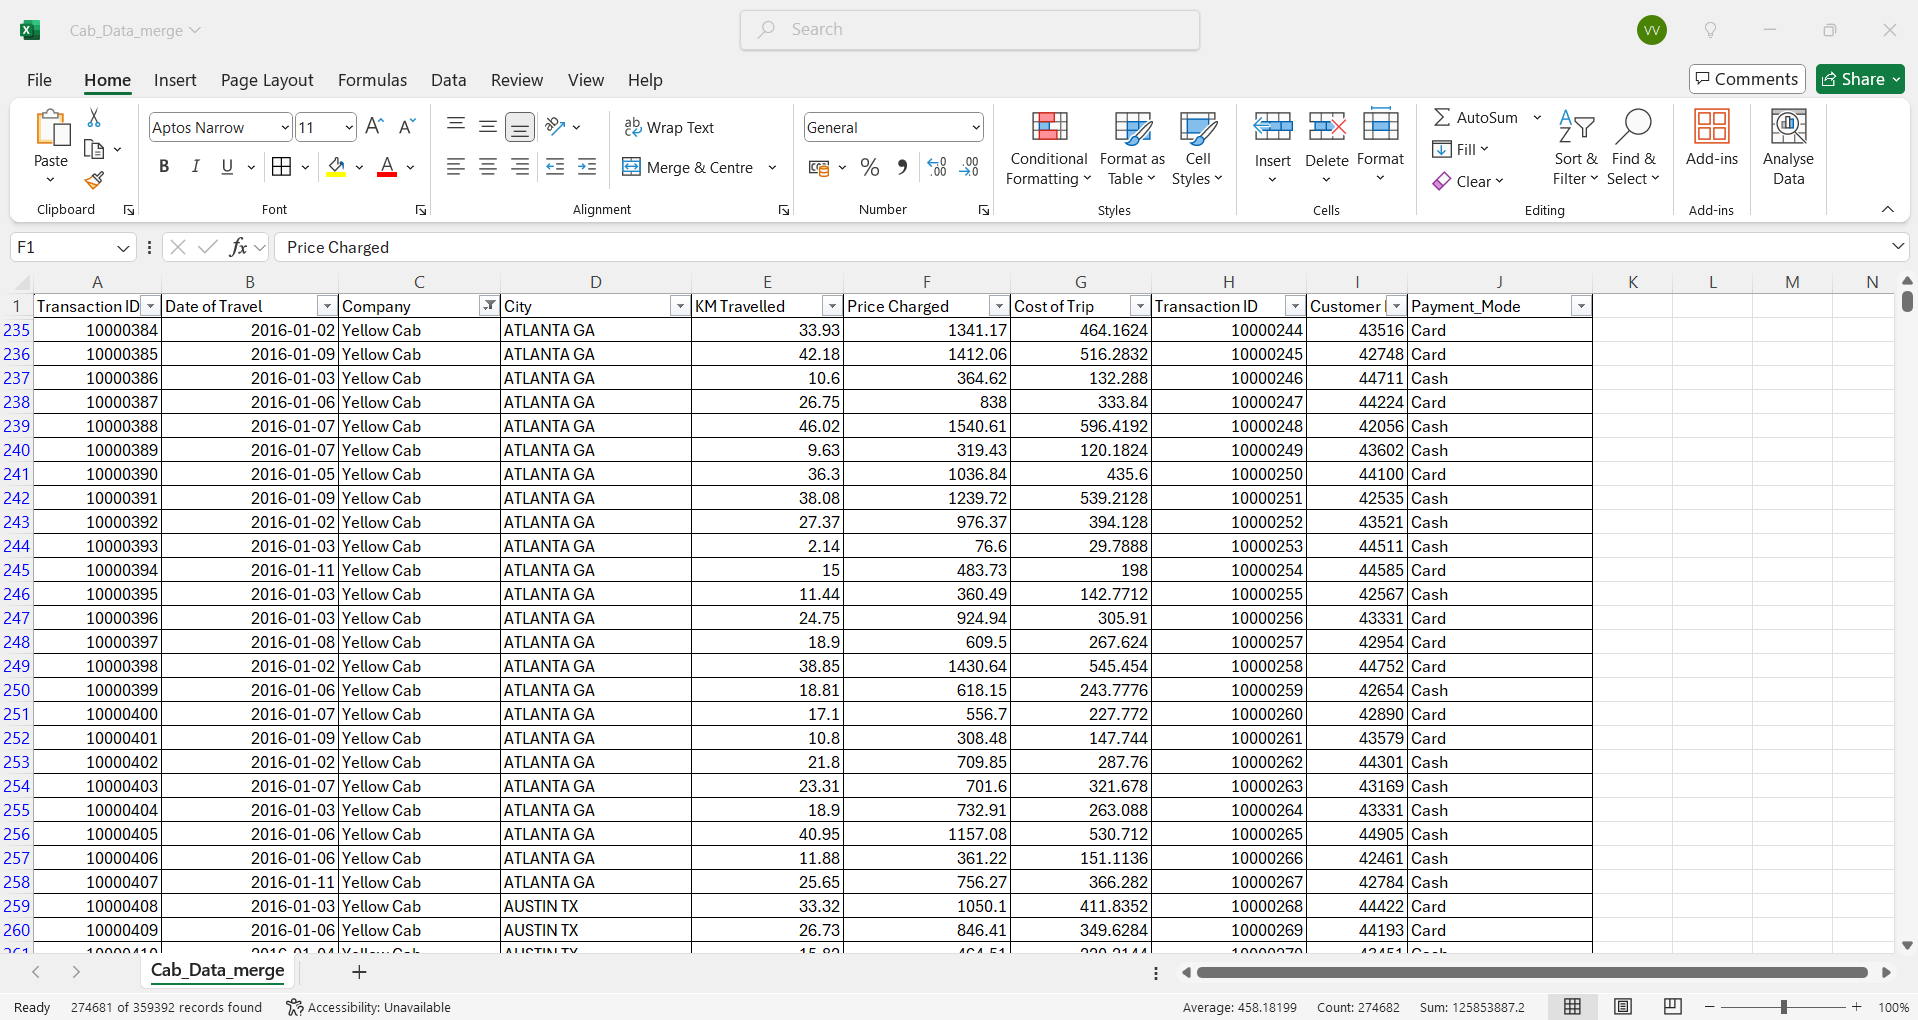

# Areas to investigate:

# Which company has maximum cab users at a particular time period?
# Does margin proportionally increase with increase in number of customers?
# What are the attributes of these customer segments?

# Which company has maximum cab users at a particular time period
# 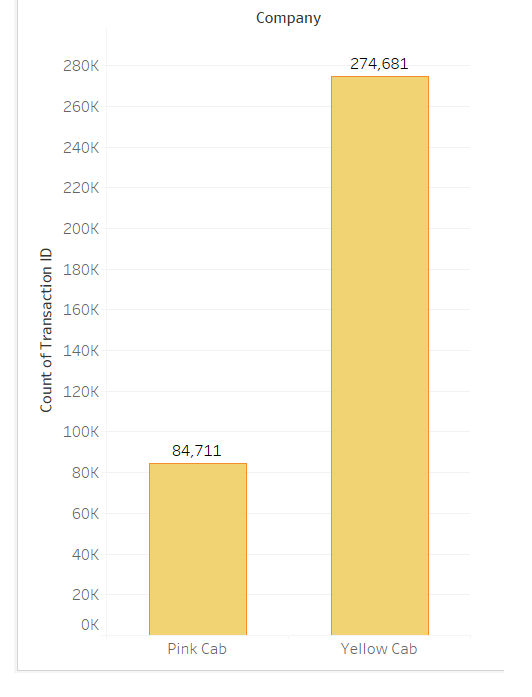


# What are the attributes of these customer segments?
# Demographic Attributes: Age Gender Income level Geographic Attributes: Location (country, region, city) Behavioral Attributes: Purchasing behavior
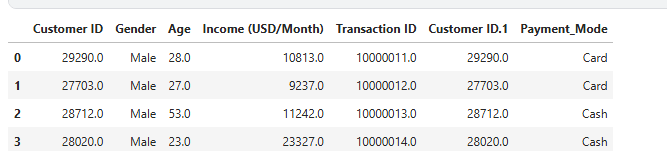
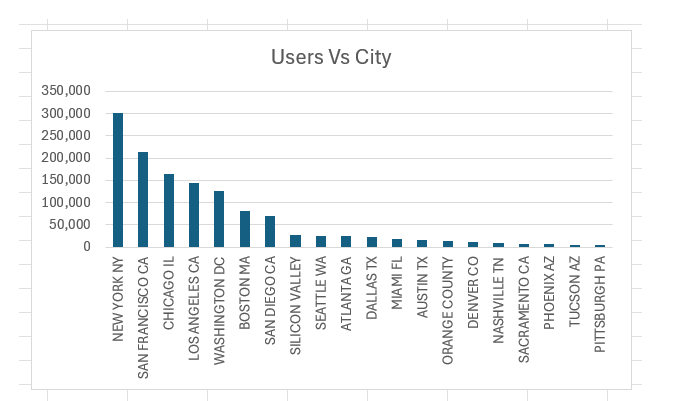
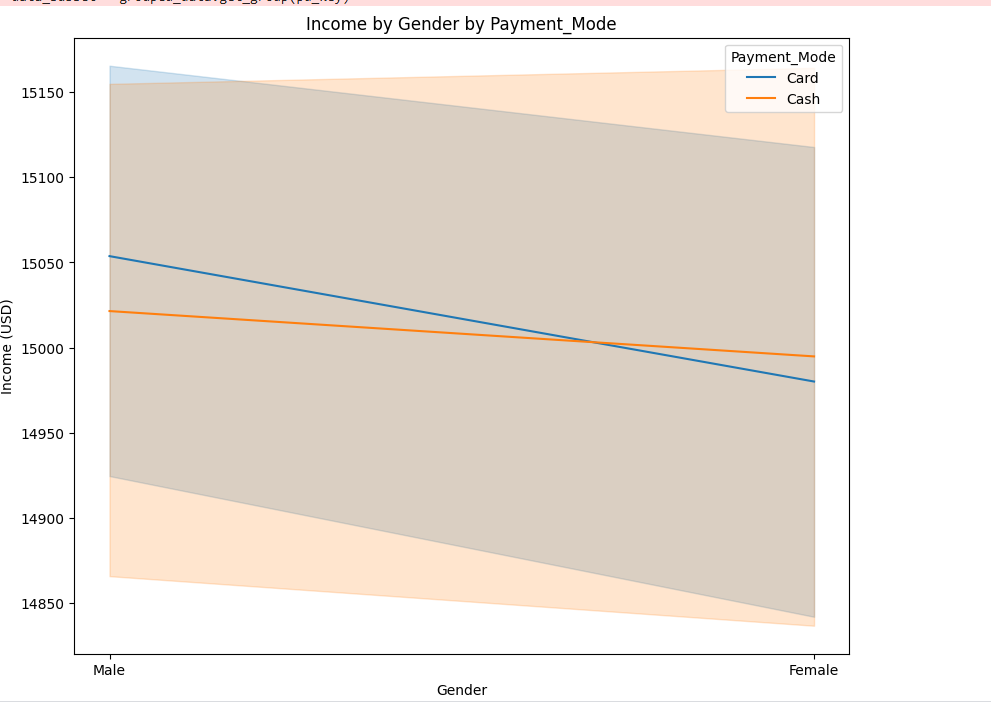
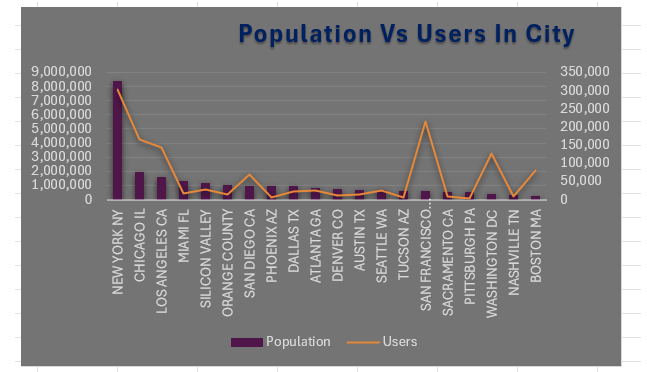
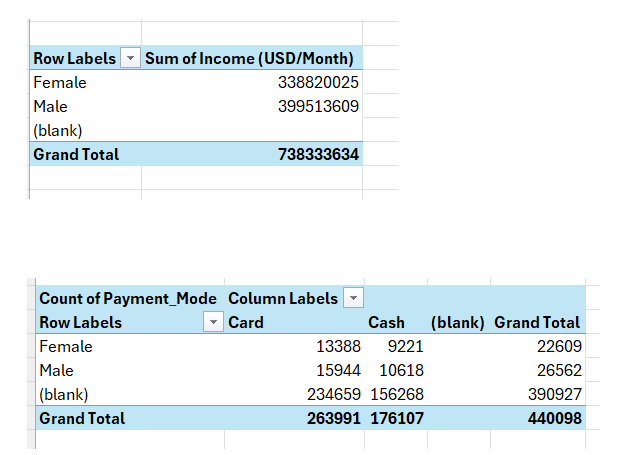

# Does margin proportionally increase with increase in number of customers?
# 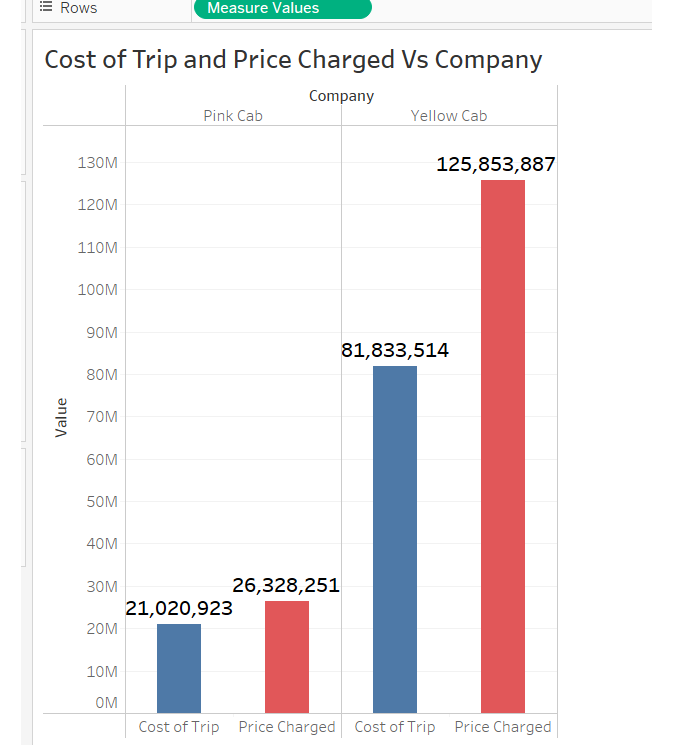

In [75]:
import pandas as pd

df = pd.read_csv('/kaggle/input/id-payment/Customer_ID_payment.csv', low_memory=False)

In [76]:
df

Customer ID Gender   Age  Income (USD/Month)  Transaction ID  \
0           29290.0   Male  28.0             10813.0      10000011.0   
1           27703.0   Male  27.0              9237.0      10000012.0   
2           28712.0   Male  53.0             11242.0      10000013.0   
3           28020.0   Male  23.0             23327.0      10000014.0   
4           27182.0   Male  33.0              8536.0      10000015.0   
...             ...    ...   ...                 ...             ...   
440094          NaN    NaN   NaN                 NaN      10440104.0   
440095          NaN    NaN   NaN                 NaN      10440105.0   
440096          NaN    NaN   NaN                 NaN      10440106.0   
440097          NaN    NaN   NaN                 NaN      10440107.0   
440098          NaN    NaN   NaN                 NaN      10440108.0   

        Customer ID.1 Payment_Mode  
0             29290.0         Card  
1             27703.0         Card  
2             28712.0         Cash  
3             28020.0         Cash  
4             27182.0         Card  
...               ...          ...  
440094        53286.0         Cash  
440095        52265.0         Cash  
440096        52175.0         Card  
440097        52917.0         Card  
440098        51587.0         Card  

[440099 rows x 7 columns]

#  Here are some common attributes used to define customer segments:
# 
# Demographic Attributes:
# Age
# Gender
# Income level
# Geographic Attributes:
# Location (country, region, city)
# Behavioral Attributes:
# Purchasing behavior


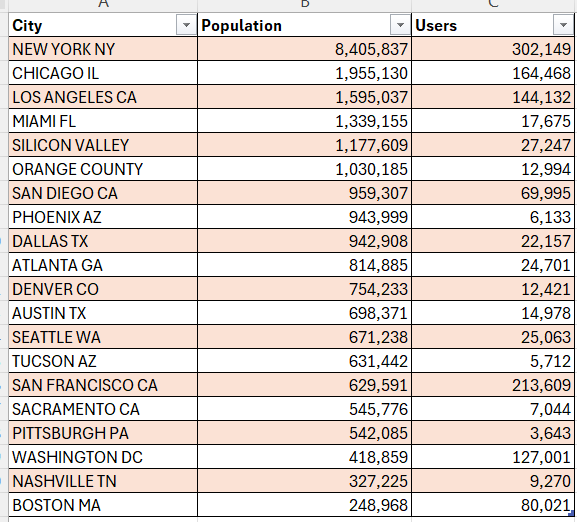

# Data Showing 84712 Pink Cab Users

# 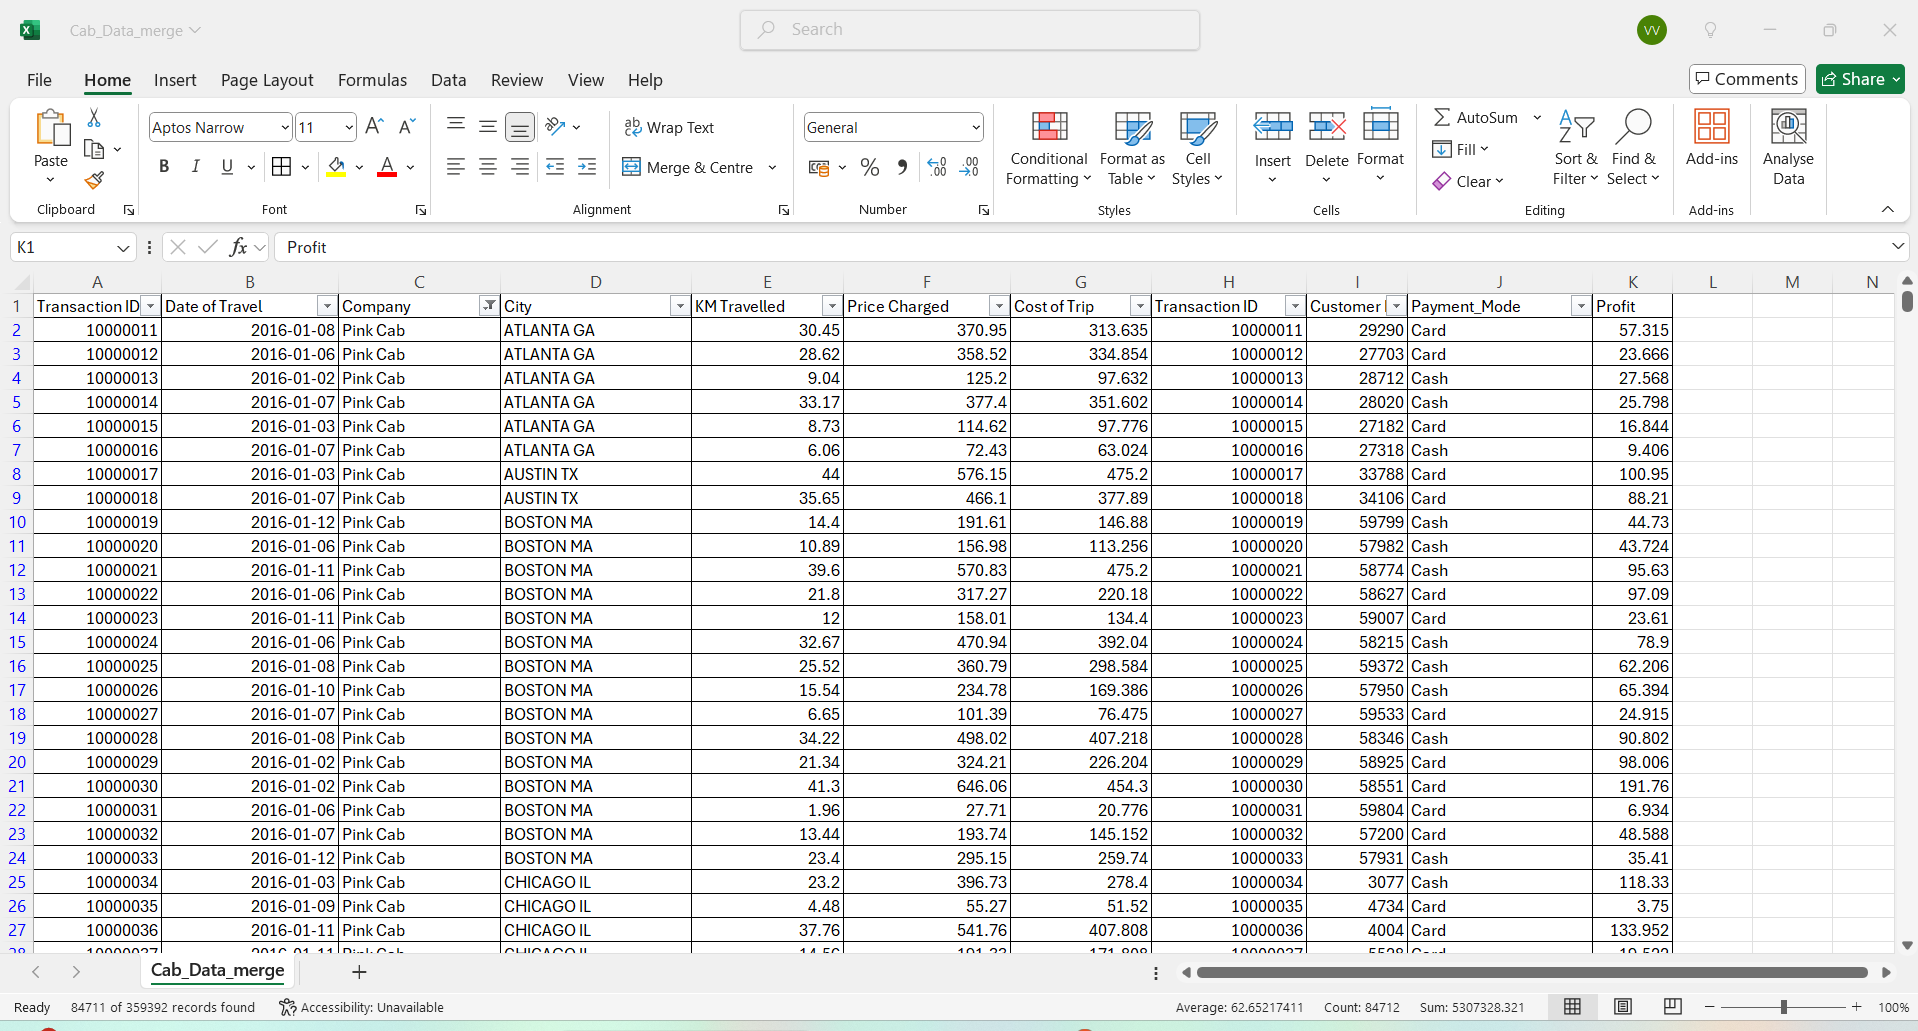

# Data showing 274682 Yellow Cab users

# 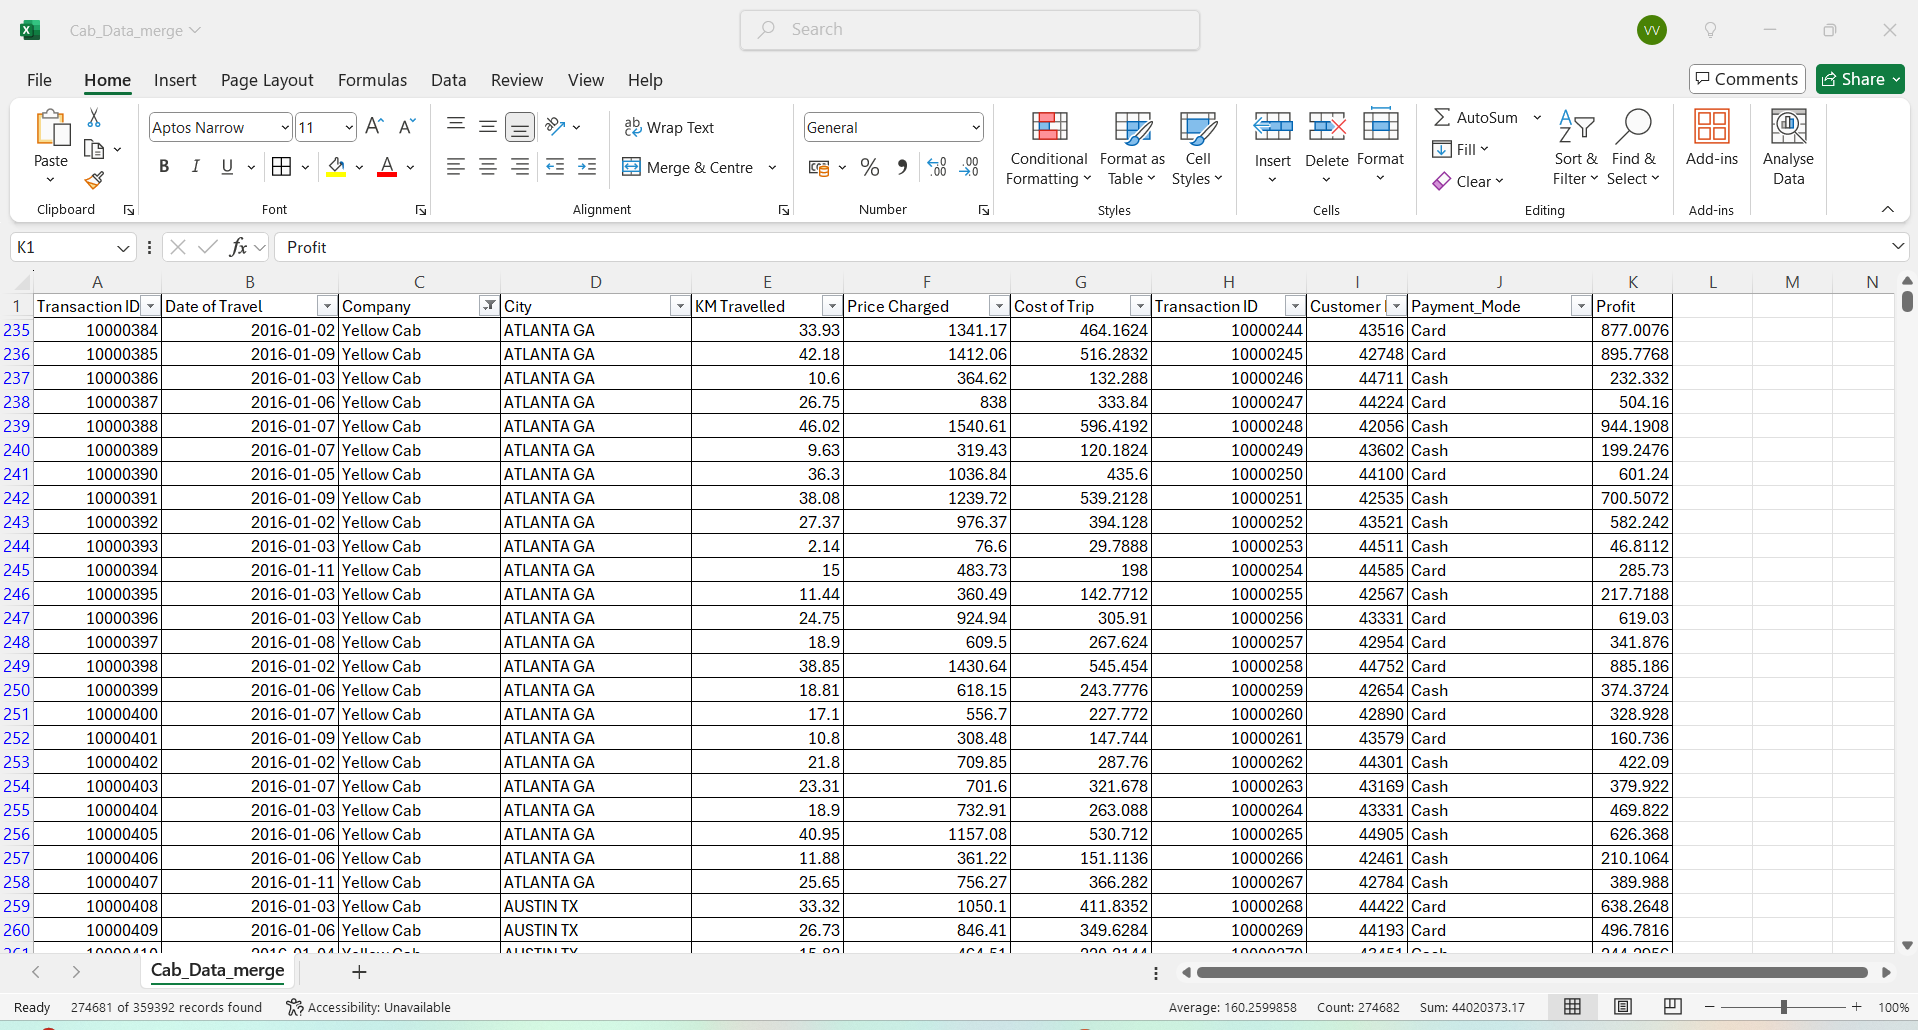

# Data Showing 110056 **Cash Users** for Yellow Cab

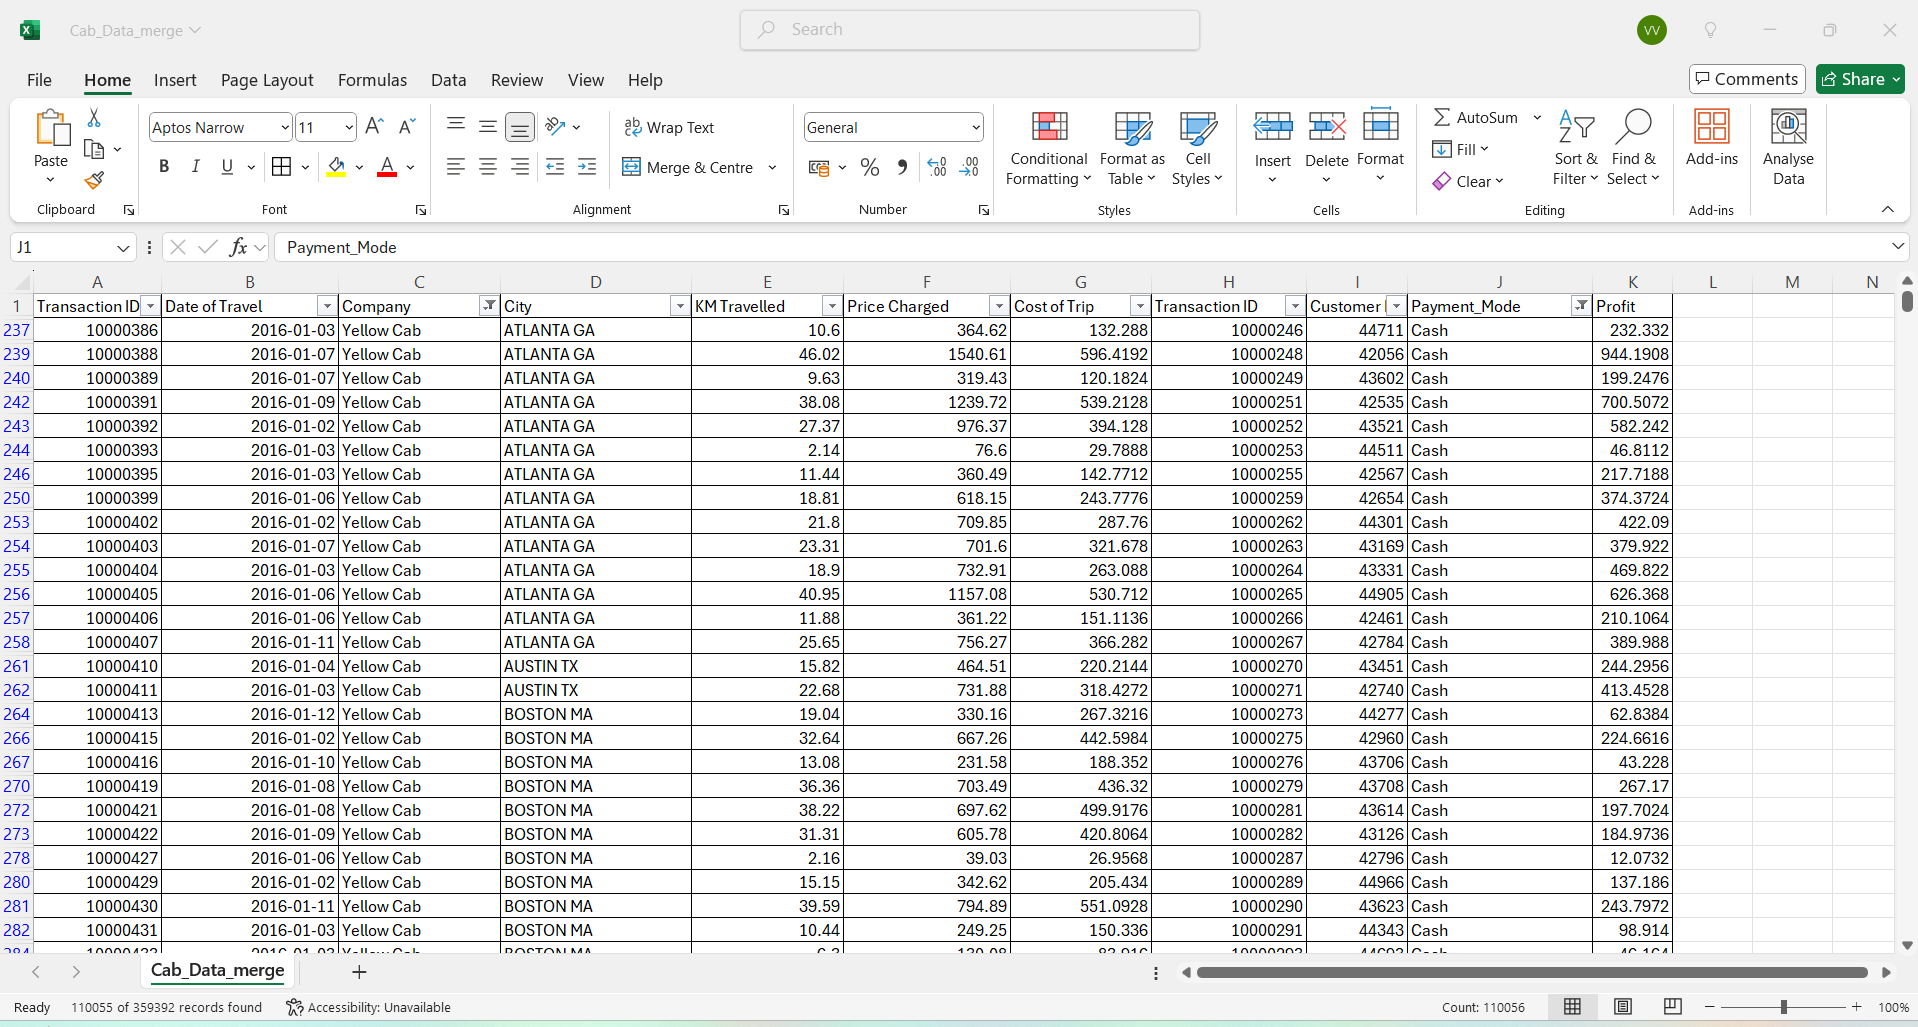

# Data showing 164627 **Card users** for Yellow Cab

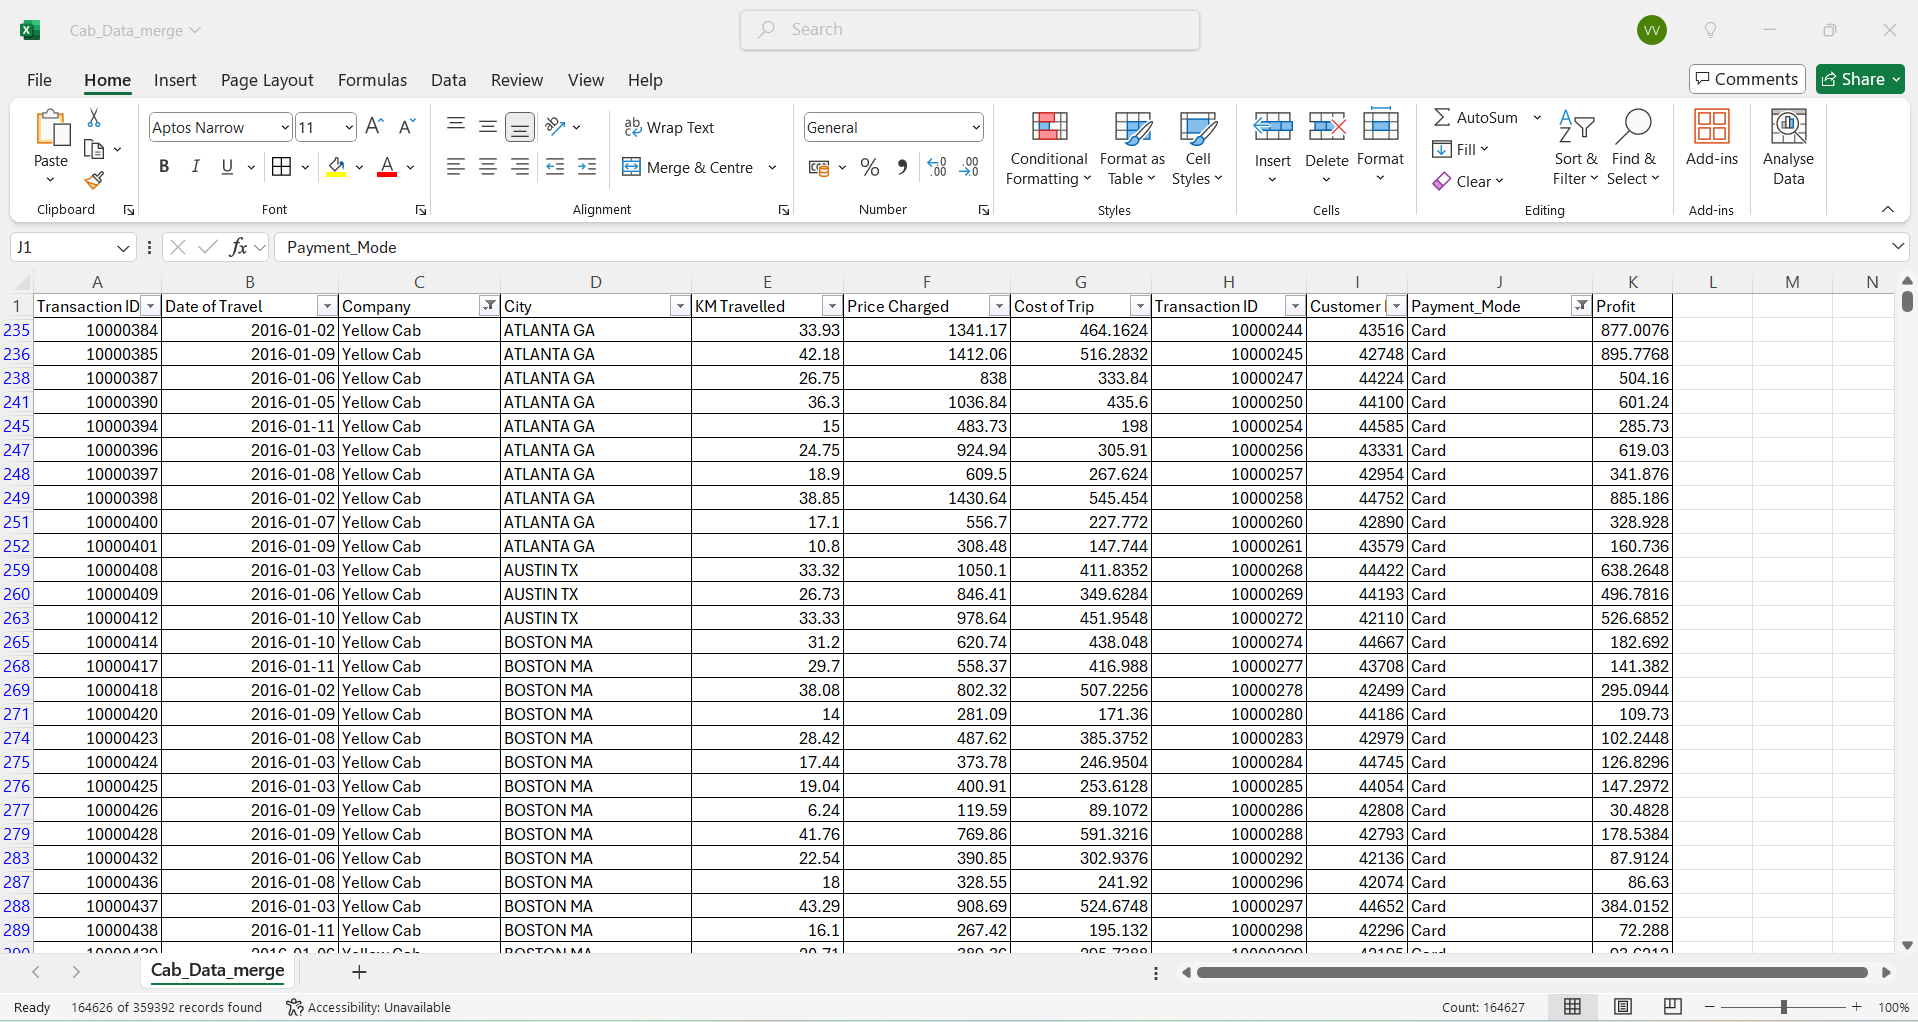

# Data showing 50917 count of **card users** for Pink cab

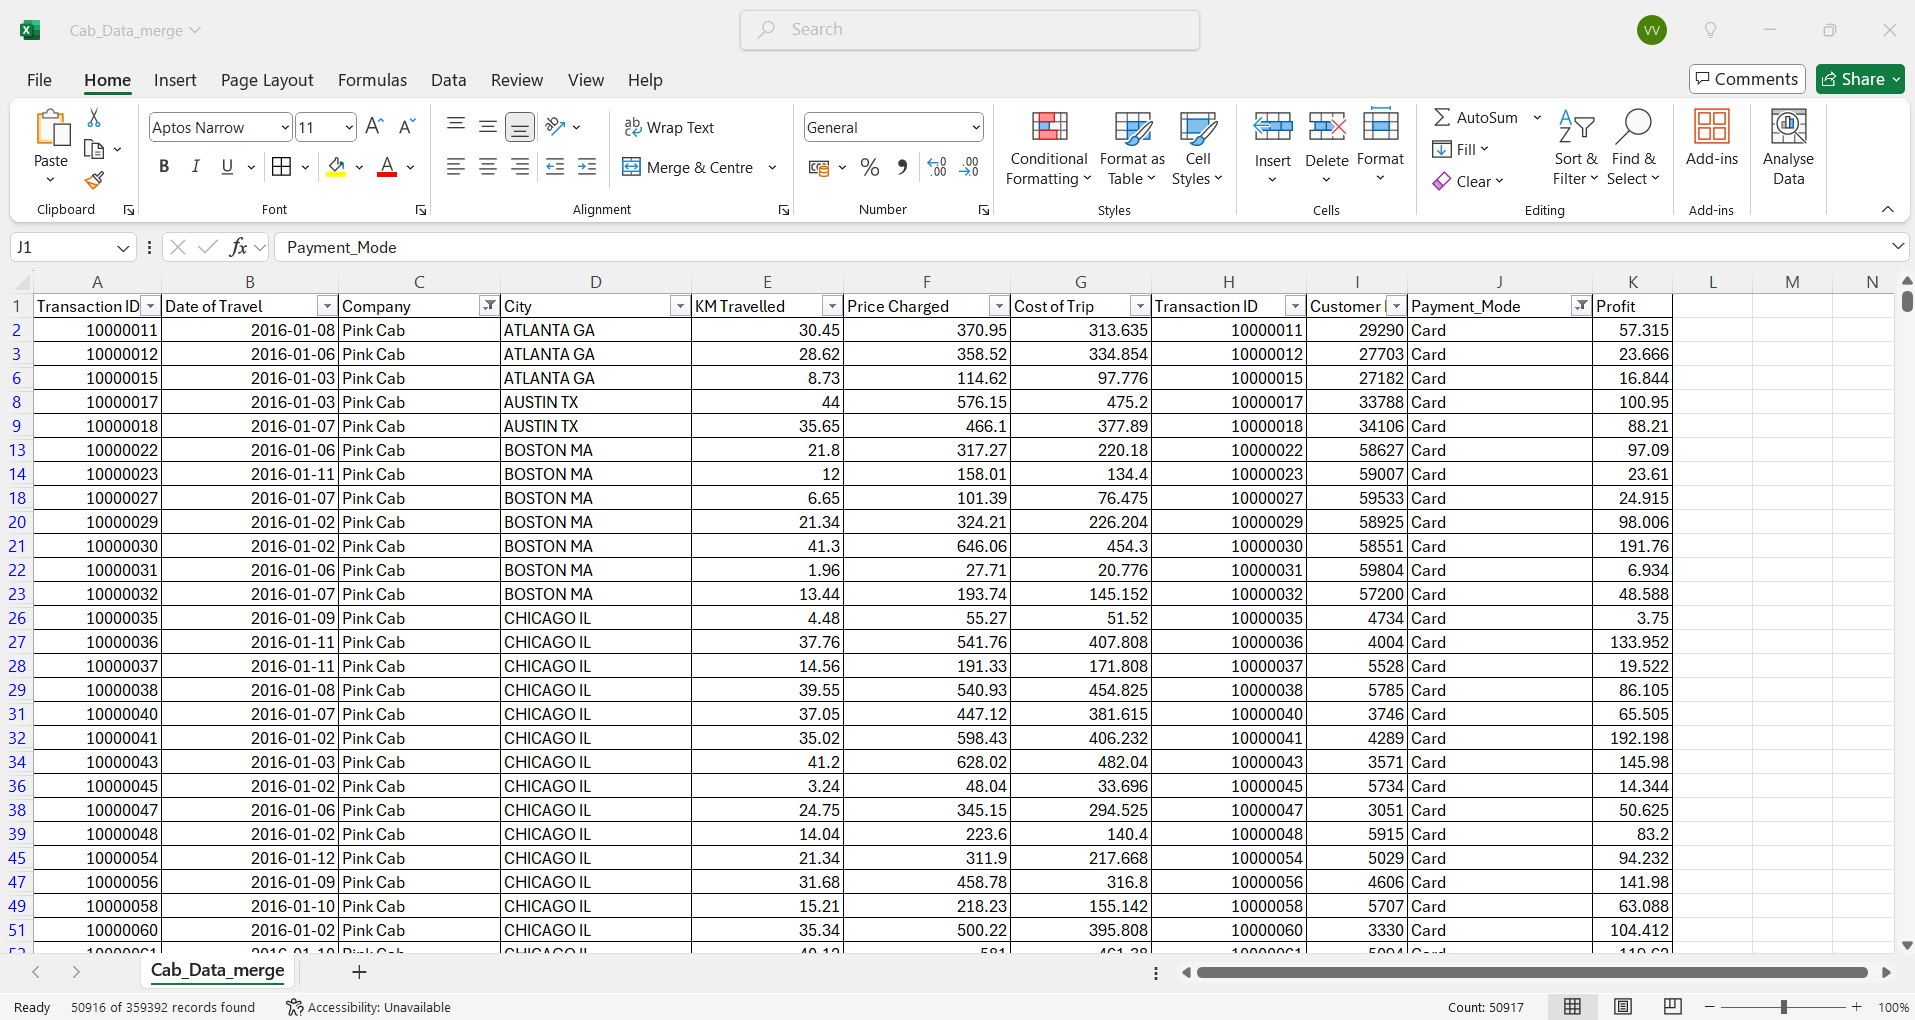

# Data showing 33796 count of **Cash users** for Pink Cab

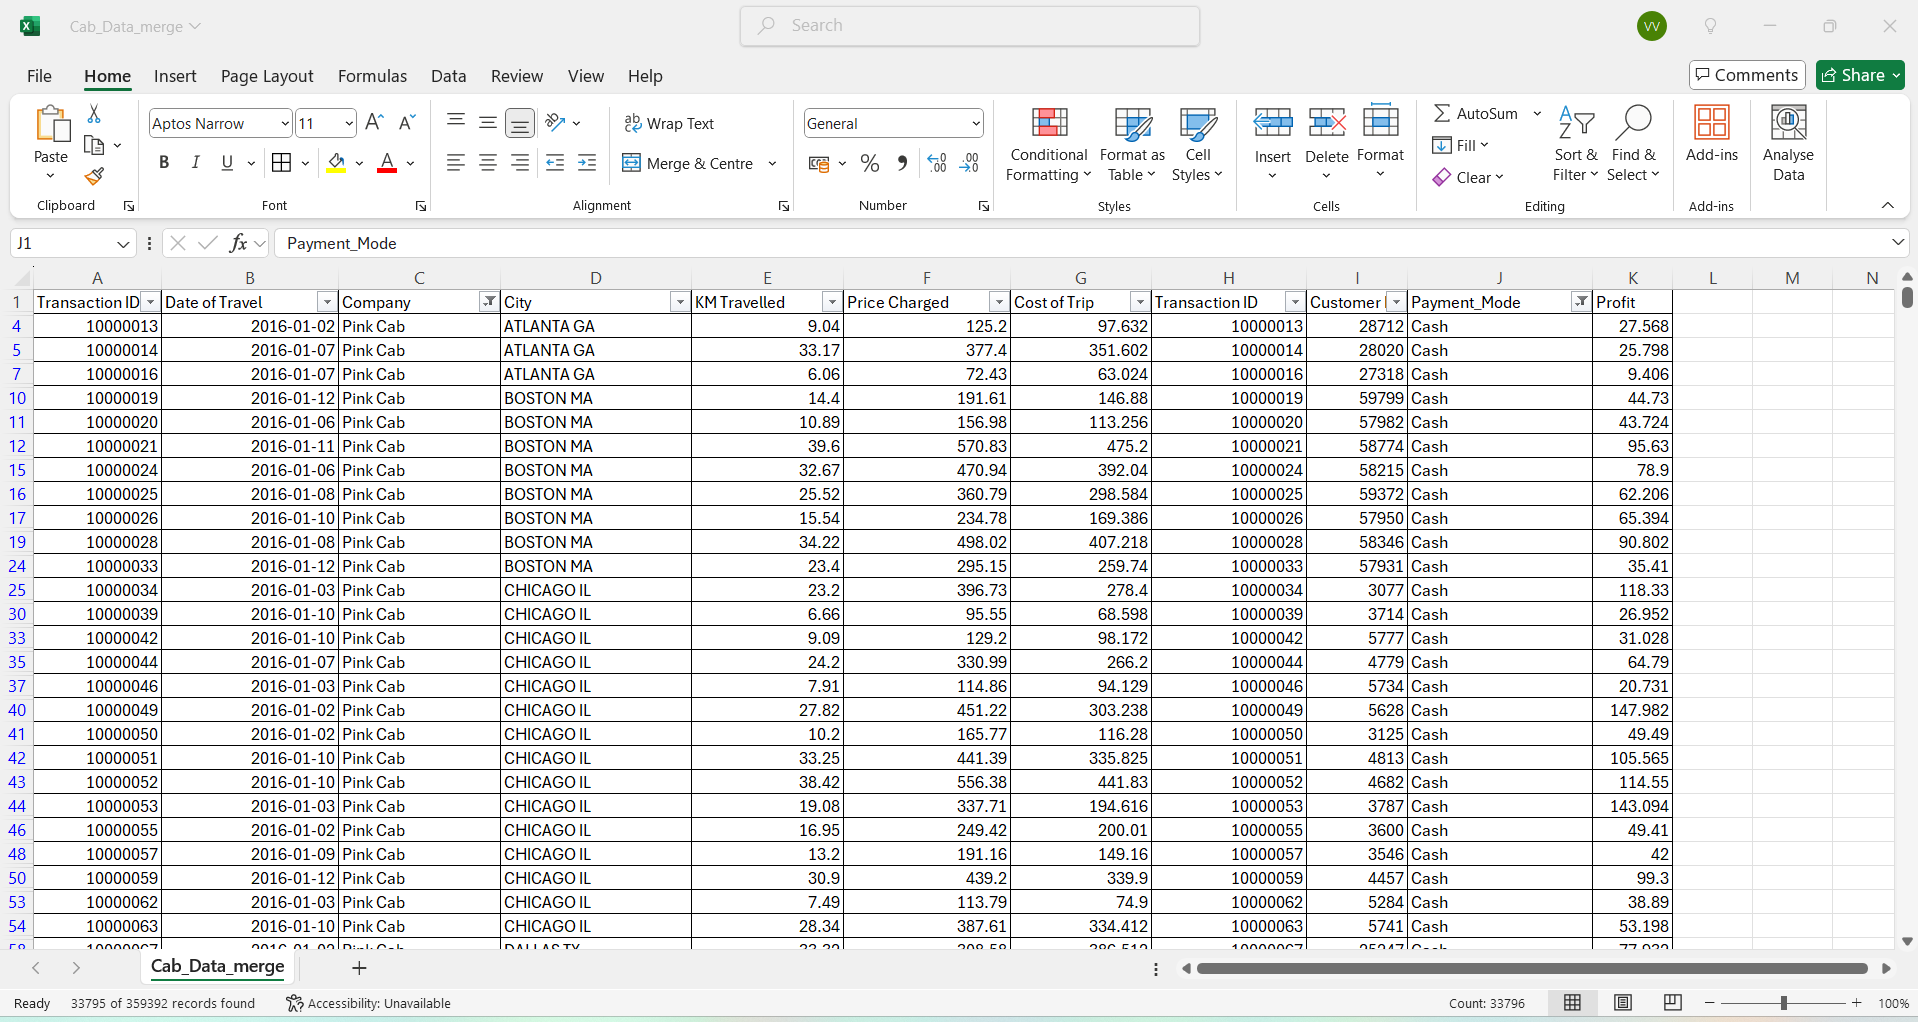

# 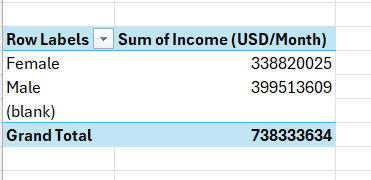

# 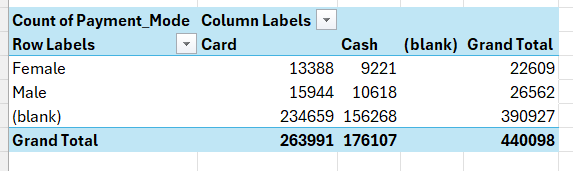

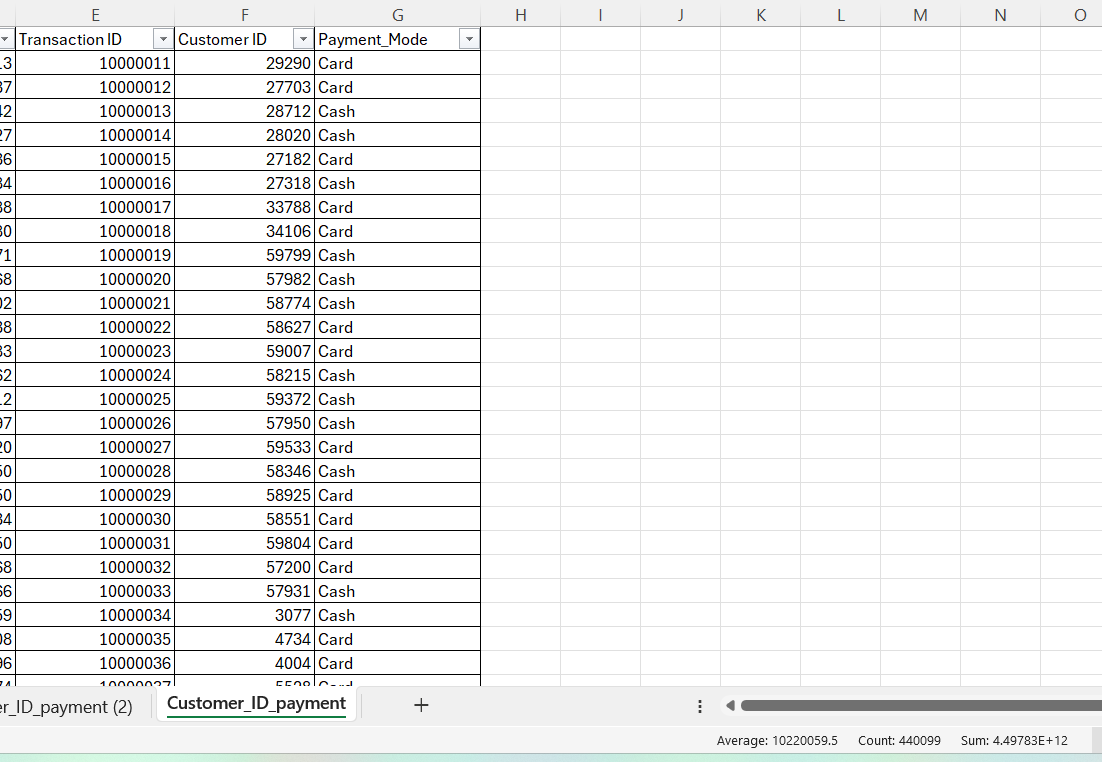

#  DATA SHOWING 359393 rows in dataset

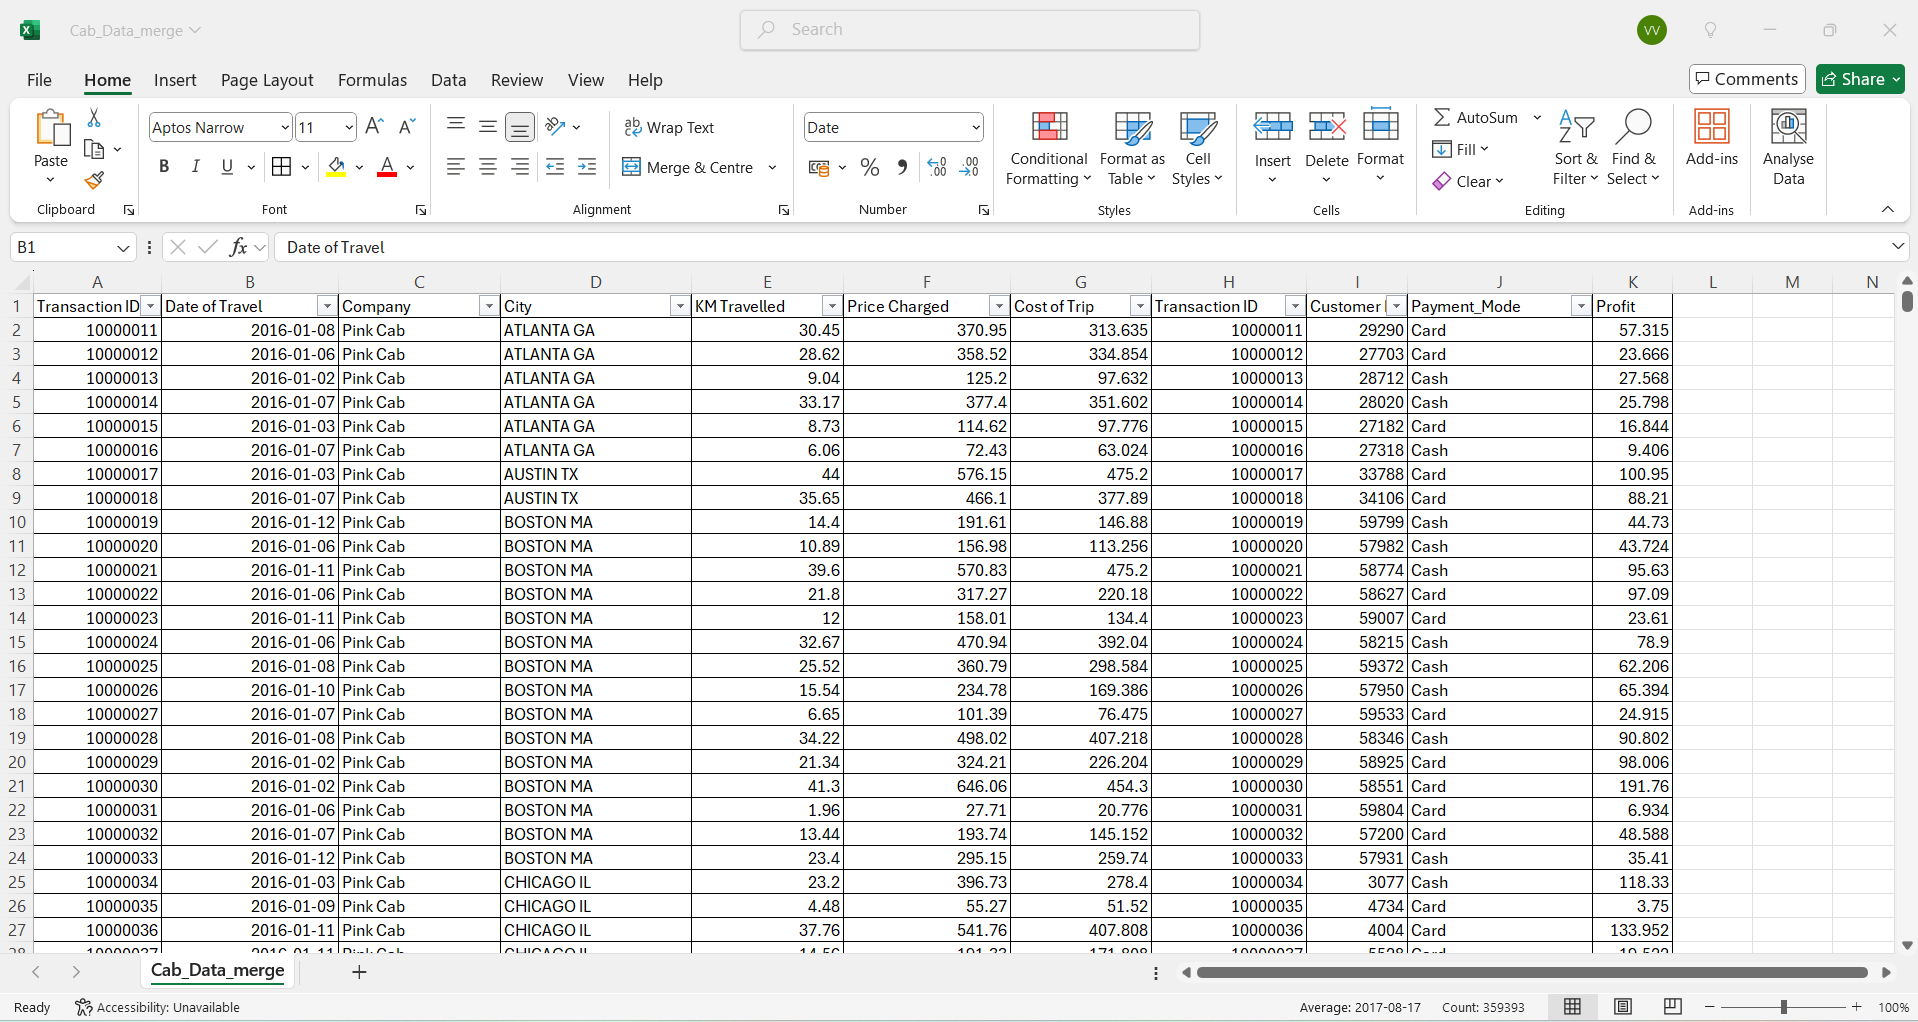

# DataSet (Links to an external site.)
# 
# The Client
# 
# XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# From the above hypothesis the Answers for Questions are found to be
# Which company has maximum cab users at a particular time period?
#      Yellow Cab have more number of users than Pink Cab
#    **Yellow Cab users - 274682** 
#    **Pink Cab users - 84712** 
# Does margin proportionally increase with increase in number of customers?
#           Yes Margin Proportionally increase with increase in number of customers. 
# **Yellow Cab** shows Marginal increase proportionally in more number of customers
# What are the attributes of these customer segments?
#  The below attributes for customer segments are considered
#  for analysis
# Demographic Attributes:
# Age
# Gender
# Income level
# Geographic Attributes:
# Location (country, region, city)
# Behavioral Attributes:
# Purchasing behavior



# **Recommendation for Investment in Yellow Cab for XYZ Company**